In [127]:
import sys
from pathlib import Path

#import inspect
#from importlib import reload

import numpy as np
import pandas as pd

import autoNeuro

In [109]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
%autoreload 3

In [11]:
#data_package = r'C:\Users\User\Documents\Skolkovo\projects\Sharjah\Schizophrenia Excel files'
data_path = Path('../../data/schizo_rna_seq')

In [12]:
files = list(data_path.iterdir())

In [13]:
files

[PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.5_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.3_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_unfiltered_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.6_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.4_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.1_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.05_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.01_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_unfiltered_raw.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.2_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.02_normalized.xlsx')]

In [6]:
%%time
data = {
    fname.stem: pd.read_excel(fname) for fname in files #if fname.stem == 'Schizo_filtered0.6_normalized'
}

CPU times: user 36.8 s, sys: 103 ms, total: 36.9 s
Wall time: 37 s


In [14]:
# check for NaNs
for k, v in data.items():
    print(k, v.isnull().sum().sum())

Schizo_filtered0.5_normalized 0
Schizo_filtered0.3_normalized 0
Schizo_unfiltered_normalized 0
Schizo_filtered0.6_normalized 0
Schizo_filtered0.4_normalized 0
Schizo_filtered0.1_normalized 0
Schizo_filtered0.05_normalized 0
Schizo_filtered0.01_normalized 0
Schizo_unfiltered_raw 0
Schizo_filtered0.2_normalized 0
Schizo_filtered0.02_normalized 0


In [289]:
def process_dataset(data):
    #data = pd.read_excel(filepath)
    
    data = data.T
    data = data.reset_index()
    data.columns = data.iloc[0]
    data = data[2:]
    data = data.drop_duplicates()
    
    data['target'] = data['NAME'].apply(lambda x: x.split("_")[0])
    data['target'] = data['target'].map({'Schizo1':1, 'Ctrl1': 0})
    
    #print(data.select_dtypes(include=['object']))
    
    y = data['target'].copy().reset_index(drop=True)
    names = data['NAME'].copy()
    X = data.iloc[:, 1: -1].reset_index(drop=True).astype(np.float64)
    
    return X, y, names

In [290]:
%%time
processed = {
    fname: process_dataset(df) for fname, df in data.items()
}

CPU times: user 7.08 s, sys: 248 ms, total: 7.33 s
Wall time: 8.16 s


In [291]:
for k in sorted(processed.keys(), reverse=True):
    print(k, processed[k][0].shape)

Schizo_unfiltered_raw (72, 20935)
Schizo_unfiltered_normalized (72, 20935)
Schizo_filtered0.6_normalized (72, 3)
Schizo_filtered0.5_normalized (72, 13)
Schizo_filtered0.4_normalized (72, 41)
Schizo_filtered0.3_normalized (72, 106)
Schizo_filtered0.2_normalized (72, 387)
Schizo_filtered0.1_normalized (72, 2503)
Schizo_filtered0.05_normalized (72, 7480)
Schizo_filtered0.02_normalized (72, 14283)
Schizo_filtered0.01_normalized (72, 16902)


In [20]:
processed.keys()

dict_keys(['Schizo_filtered0.5_normalized', 'Schizo_filtered0.3_normalized', 'Schizo_unfiltered_normalized', 'Schizo_filtered0.6_normalized', 'Schizo_filtered0.4_normalized', 'Schizo_filtered0.1_normalized', 'Schizo_filtered0.05_normalized', 'Schizo_filtered0.01_normalized', 'Schizo_unfiltered_raw', 'Schizo_filtered0.2_normalized', 'Schizo_filtered0.02_normalized'])

In [34]:
sorted(processed.keys(), reverse=True)

['Schizo_unfiltered_raw',
 'Schizo_unfiltered_normalized',
 'Schizo_filtered0.6_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.1_normalized',
 'Schizo_filtered0.05_normalized',
 'Schizo_filtered0.02_normalized',
 'Schizo_filtered0.01_normalized']

In [37]:
filtered = [
  'Schizo_filtered0.6_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.1_normalized',
 'Schizo_filtered0.05_normalized',
]

In [25]:
import time
from datetime import datetime

Start Schizo_filtered0.6_normalized, shape (72, 3)
model_name xgb, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                   

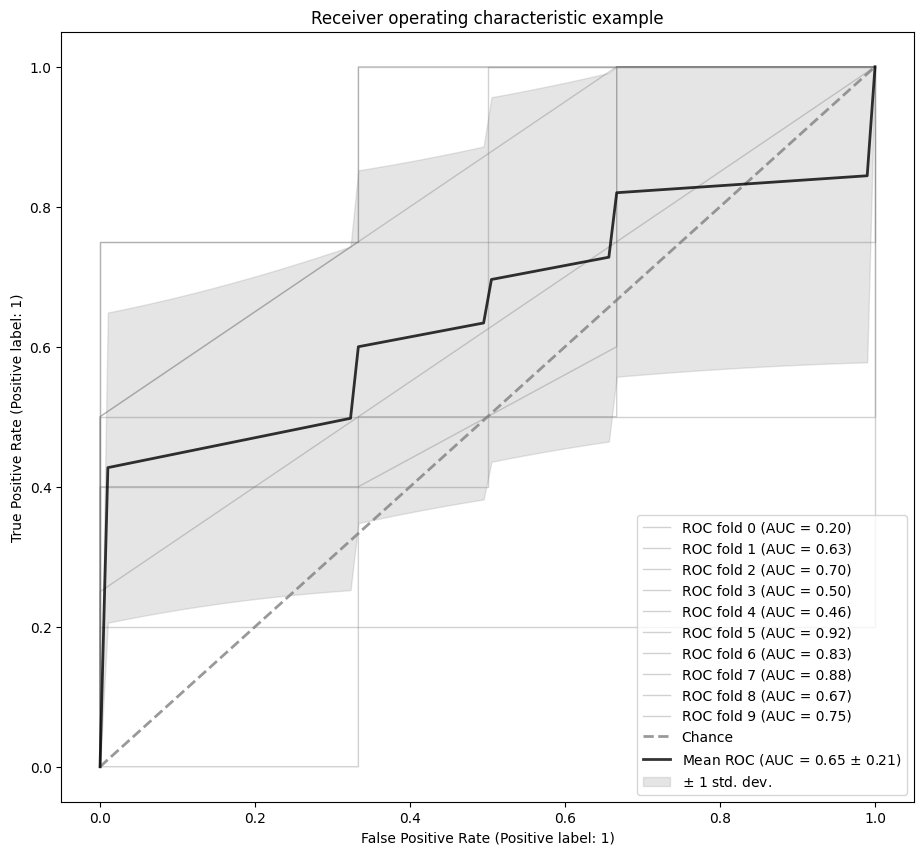

--------------------
______________stats___________________
NEBL
Test normality:  2.608138593984677e-08 3.1243924780710586e-08
Patient:  3.9499311209302315
Control:  2.9334893074074073
Test homogenius: LeveneResult(statistic=3.672242576747095, pvalue=0.05952996859626206)
MannwhitneyuResult(statistic=684.0, pvalue=0.13671154769550853)


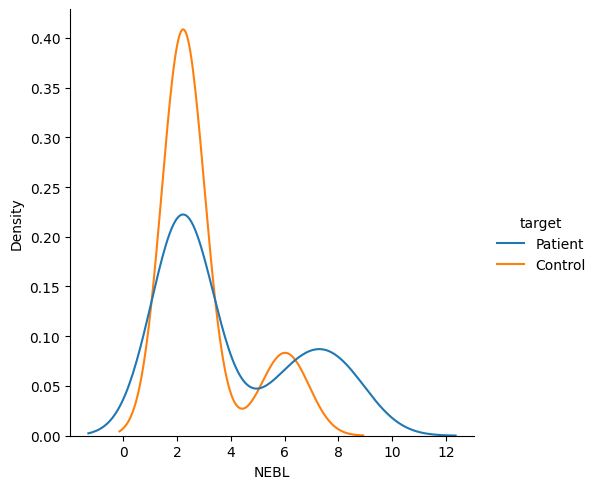

HLA-DRB1
Test normality:  1.2565293694422053e-08 2.174923793063499e-06
Patient:  4.827467232558139
Control:  4.943134477777778
Test homogenius: LeveneResult(statistic=0.016457993004798808, pvalue=0.898299162468871)
MannwhitneyuResult(statistic=558.0, pvalue=0.7845052939116229)


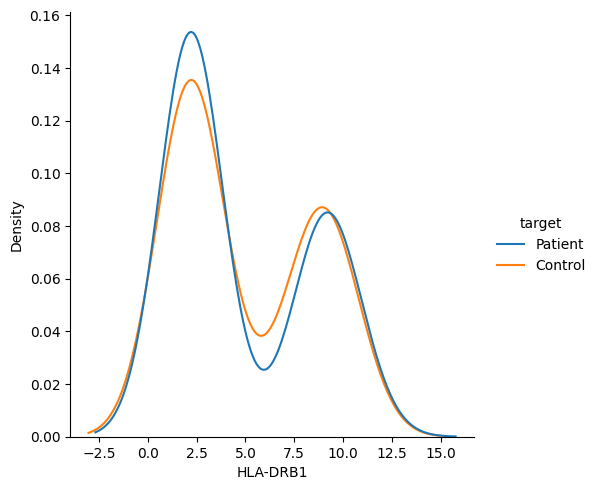

ALAS2
Test normality:  6.919271267058491e-10 2.4599375314515726e-10
Patient:  3.4761219813953486
Control:  2.436861622222222
Test homogenius: LeveneResult(statistic=4.2995939285359634, pvalue=0.041912117087313586)
Ttest_indResult(statistic=2.4956053302377272, pvalue=0.015553320969636637)


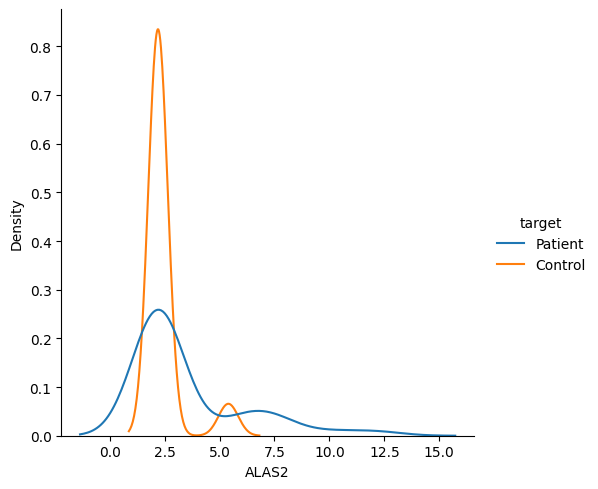

_______________________________________________
Time elapsed, s: 121
Start Schizo_filtered0.5_normalized, shape (72, 13)
model_name xgb, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
             

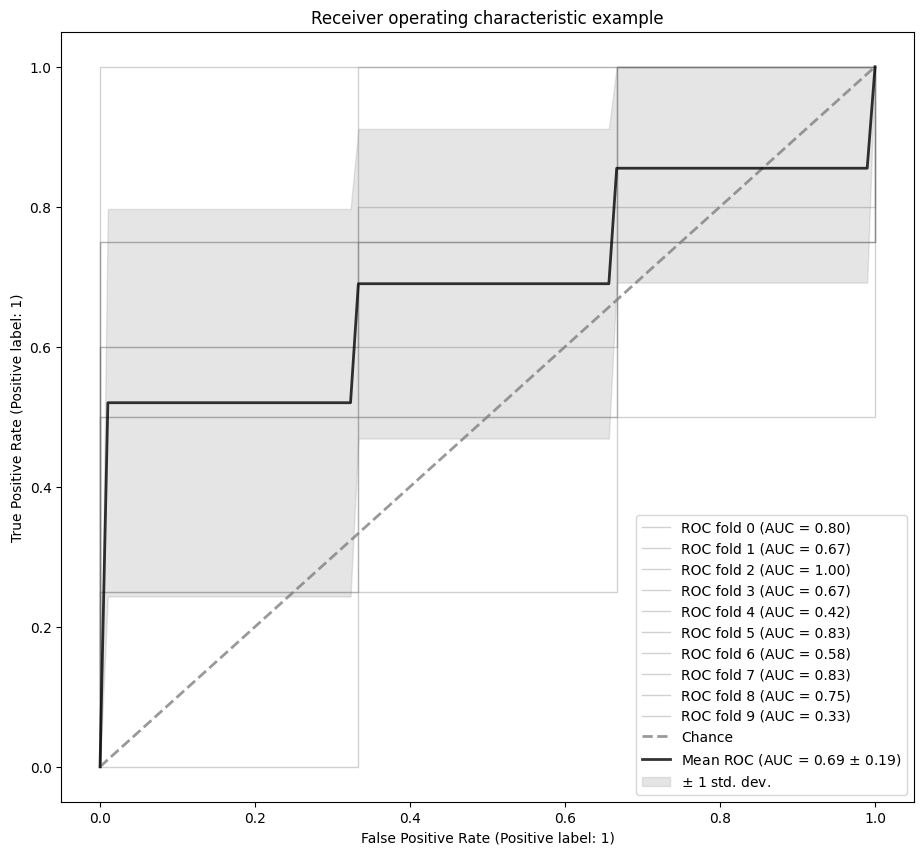

--------------------
______________stats___________________
PTGS2
Test normality:  1.23458517009567e-06 0.0003408843476790935
Patient:  4.01490143488372
Control:  2.7216119518518522
Test homogenius: LeveneResult(statistic=11.021635899500813, pvalue=0.0014503409113707667)
Ttest_indResult(statistic=3.7121616220676534, pvalue=0.0005524172331410339)


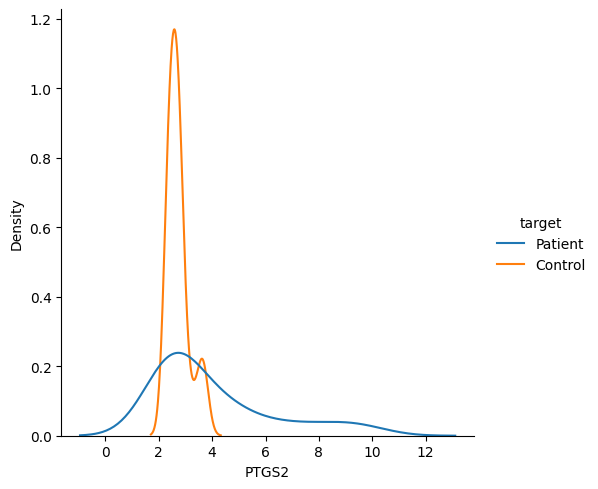

UTS2
Test normality:  1.6662858870475361e-09 4.3089136170237907e-07
Patient:  3.5239603418604655
Control:  3.1600613185185185
Test homogenius: LeveneResult(statistic=1.0710671287002977, pvalue=0.3043710689370497)
MannwhitneyuResult(statistic=504.5, pvalue=0.3607988943853996)


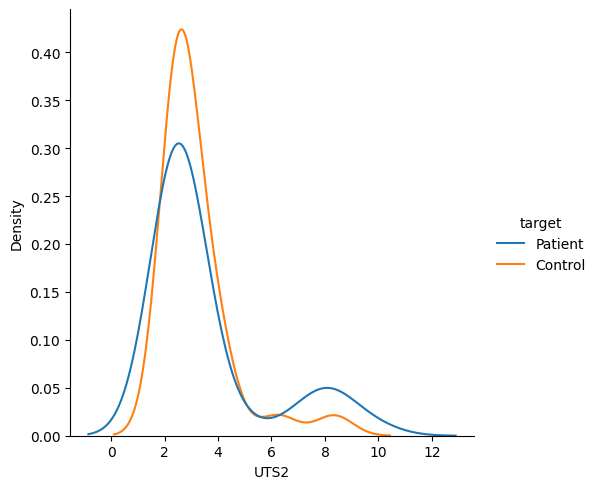

OLFM4
Test normality:  1.3048608707322273e-05 0.01057642325758934
Patient:  4.490592713953488
Control:  4.584237962962963
Test homogenius: LeveneResult(statistic=0.2998014906419131, pvalue=0.585799638400685)
MannwhitneyuResult(statistic=527.0, pvalue=0.52231601115928)


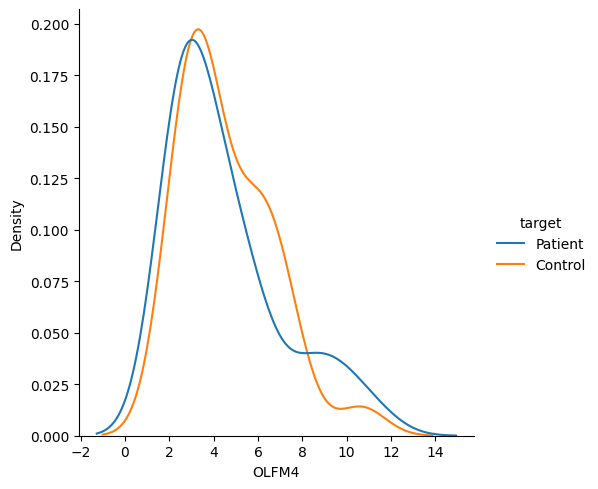

NEBL
Test normality:  2.82298007192594e-08 7.23737727525986e-08
Patient:  3.9695944953488365
Control:  2.986548718518518
Test homogenius: LeveneResult(statistic=3.4013717369374254, pvalue=0.06949861892849996)
MannwhitneyuResult(statistic=681.0, pvalue=0.1591556024527201)


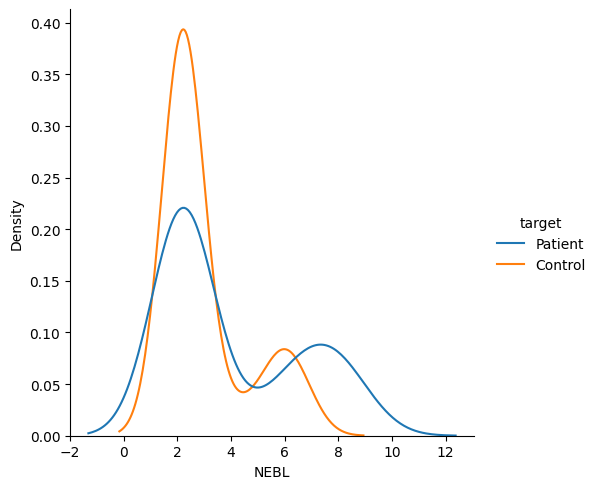

ALAS2
Test normality:  6.919271267058491e-10 2.4599375314515726e-10
Patient:  3.4761219813953486
Control:  2.436861622222222
Test homogenius: LeveneResult(statistic=4.2995939285359634, pvalue=0.041912117087313586)
Ttest_indResult(statistic=2.4956053302377272, pvalue=0.015553320969636637)


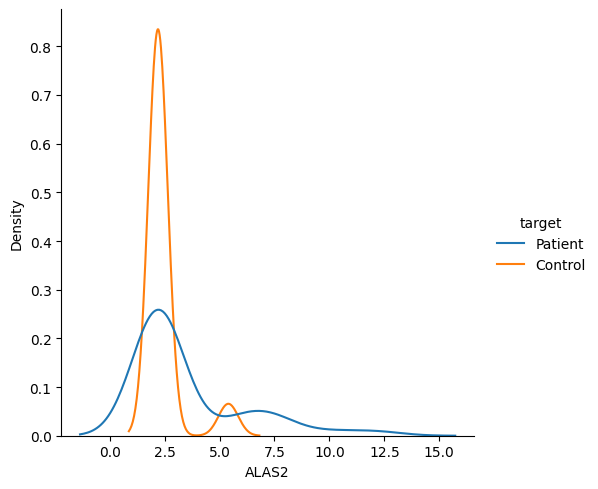

CRISP3
Test normality:  3.5334852555024554e-07 1.279497723771783e-06
Patient:  4.070661553488372
Control:  3.313196525925926
Test homogenius: LeveneResult(statistic=2.279186366362477, pvalue=0.13575353463731932)
MannwhitneyuResult(statistic=608.5, pvalue=0.737580623924653)


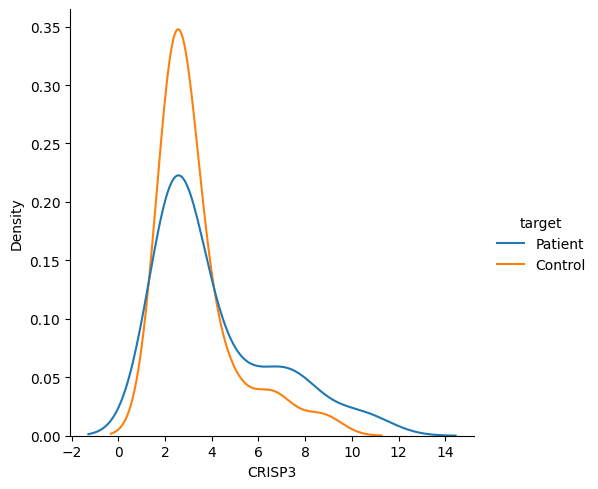

CXCL3
Test normality:  1.1738013339090969e-11 7.581856670269005e-11
Patient:  2.8483672627906973
Control:  2.2187938111111114
Test homogenius: LeveneResult(statistic=3.6327700343124603, pvalue=0.06088017375799458)
MannwhitneyuResult(statistic=762.0, pvalue=0.007980236397838219)


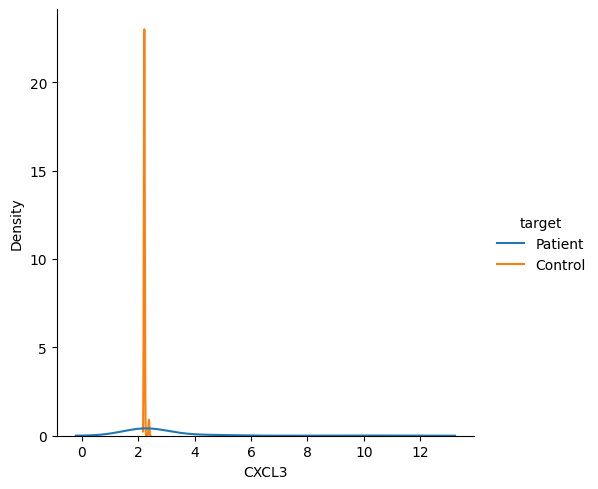

HLA-DQB1
Test normality:  1.3091703010559286e-07 4.010538305010414e-06
Patient:  8.00488653023256
Control:  7.682172485185185
Test homogenius: LeveneResult(statistic=0.04031027003038451, pvalue=0.841474466230977)
MannwhitneyuResult(statistic=619.5, pvalue=0.6409392476872671)


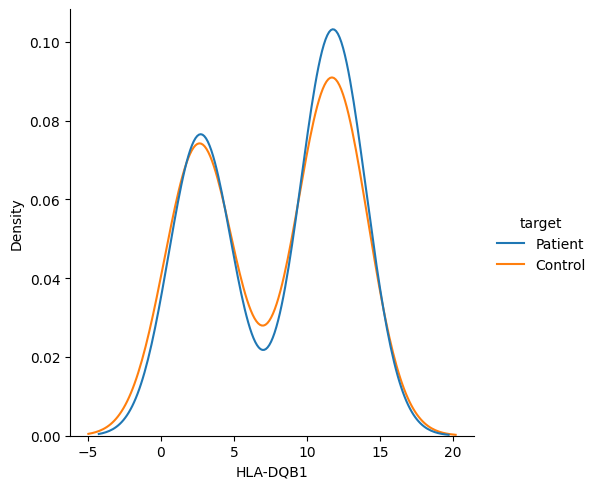

HLA-DRB1
Test normality:  1.2565293694422053e-08 2.174923793063499e-06
Patient:  4.827467232558139
Control:  4.943134477777778
Test homogenius: LeveneResult(statistic=0.016457993004798808, pvalue=0.898299162468871)
MannwhitneyuResult(statistic=558.0, pvalue=0.7845052939116229)


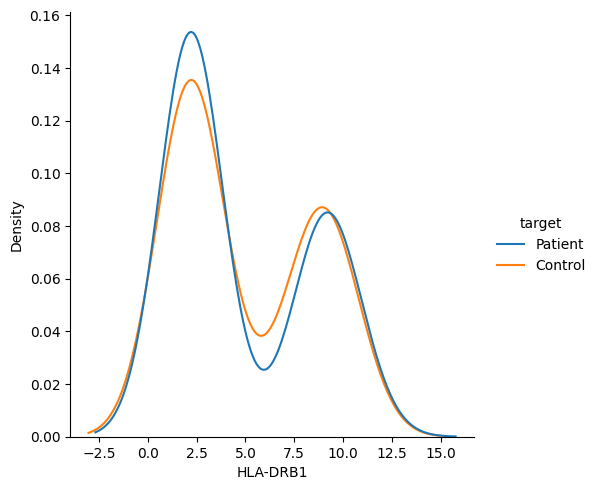

SELENBP1
Test normality:  6.579365524617131e-11 2.7202076702259603e-10
Patient:  3.040562804651162
Control:  2.3761842111111116
Test homogenius: LeveneResult(statistic=2.8122664289594517, pvalue=0.09813773529870687)
MannwhitneyuResult(statistic=668.5, pvalue=0.15118460938405195)


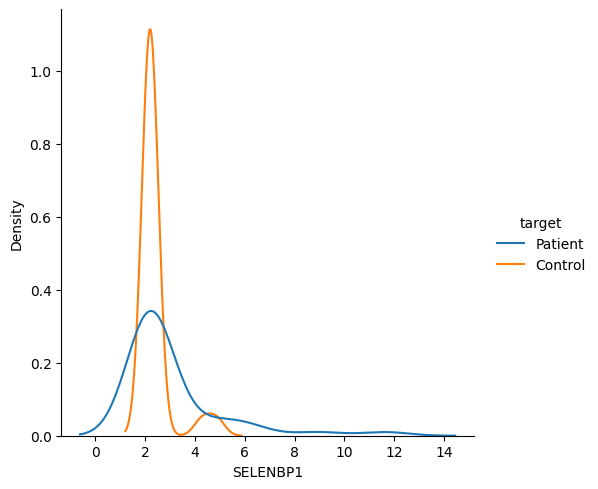

MMP8
Test normality:  6.875344737977684e-10 3.719296204351963e-09
Patient:  3.2004801534883724
Control:  2.6954500333333336
Test homogenius: LeveneResult(statistic=1.3808376022979916, pvalue=0.24405684008838927)
MannwhitneyuResult(statistic=640.0, pvalue=0.43374052691092224)


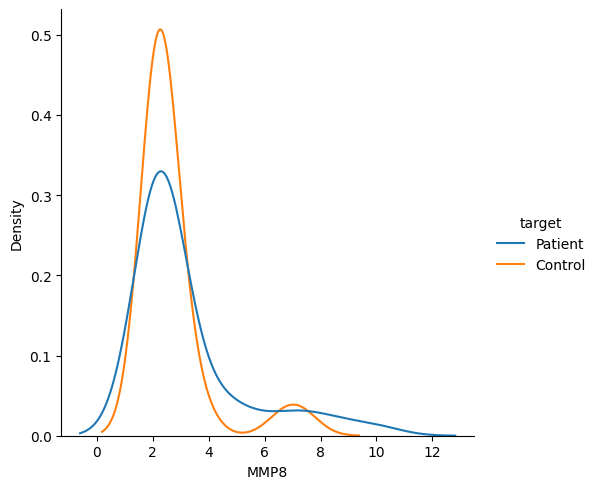

HLA-DQA1
Test normality:  9.381888332882227e-08 4.7940156946424395e-06
Patient:  7.615374962790697
Control:  7.366386562962964
Test homogenius: LeveneResult(statistic=0.030668448775147624, pvalue=0.8615025353976522)
MannwhitneyuResult(statistic=597.0, pvalue=0.8459385534366408)


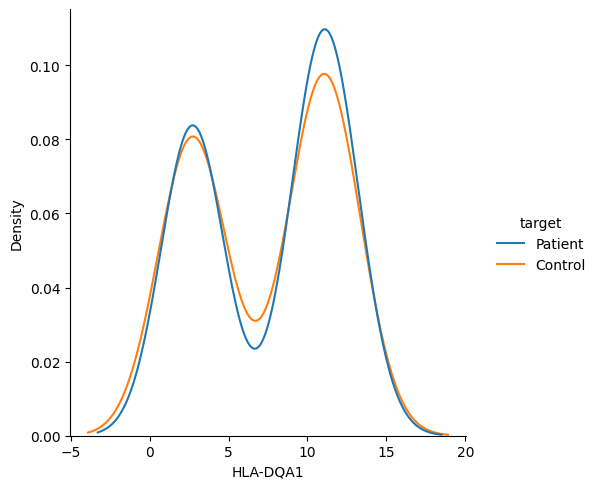

CEACAM6
Test normality:  1.165132768043975e-09 2.4500134259142214e-06
Patient:  3.1242083767441855
Control:  3.1543624074074073
Test homogenius: LeveneResult(statistic=0.005471176046700253, pvalue=0.9412534846908036)
MannwhitneyuResult(statistic=570.0, pvalue=0.9007682780976081)


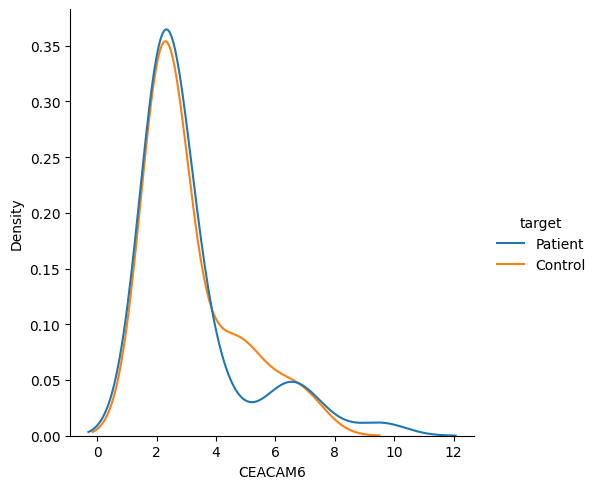

_______________________________________________
Time elapsed, s: 151
Start Schizo_filtered0.4_normalized, shape (72, 41)
model_name xgb, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
             

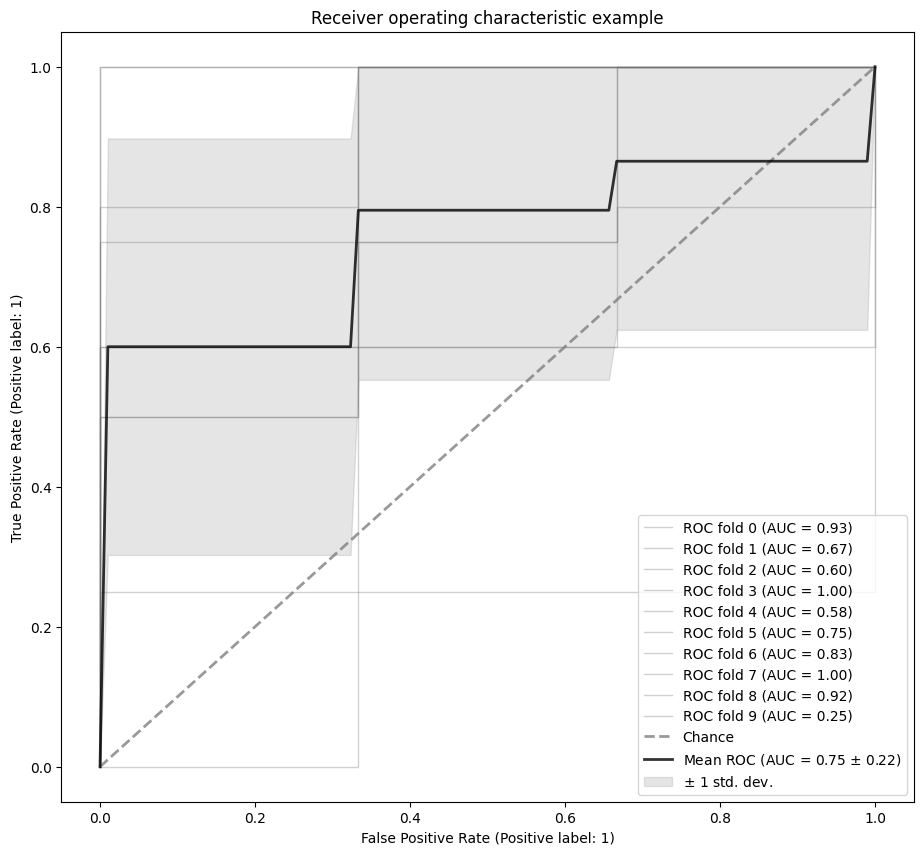

--------------------
______________stats___________________
PTGS2
Test normality:  1.23458517009567e-06 0.0003408843476790935
Patient:  4.01490143488372
Control:  2.7216119518518522
Test homogenius: LeveneResult(statistic=11.021635899500813, pvalue=0.0014503409113707667)
Ttest_indResult(statistic=3.7121616220676534, pvalue=0.0005524172331410339)


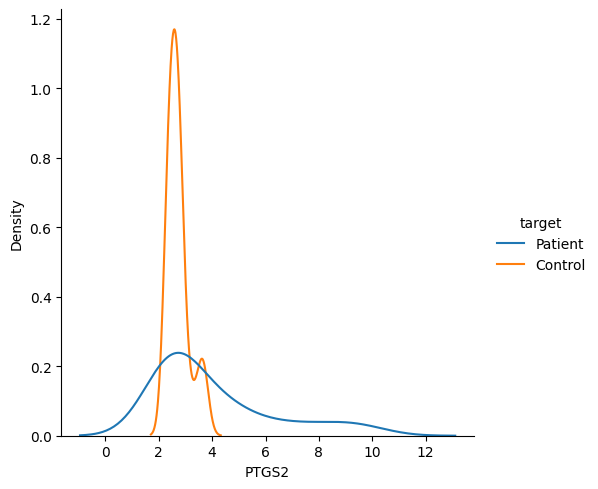

HLA-DQA1
Test normality:  3.433357154136729e-09 0.944724440574646
Patient:  10.901447197674418
Control:  11.23630411111111
MannwhitneyuResult(statistic=667.0, pvalue=0.2994240205857863)


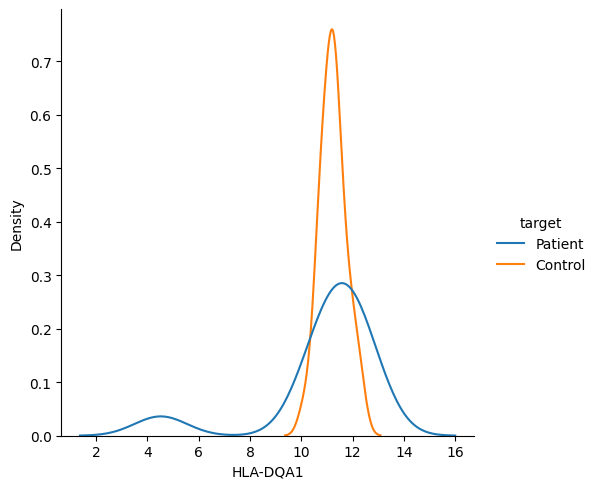

AHSP
Test normality:  4.773644257660692e-10 3.3755659378797986e-10
Patient:  3.0200753674418603
Control:  2.3372896555555553
Test homogenius: LeveneResult(statistic=4.31054427042546, pvalue=0.041659776172318023)
Ttest_indResult(statistic=2.531472874995258, pvalue=0.014418556572305221)


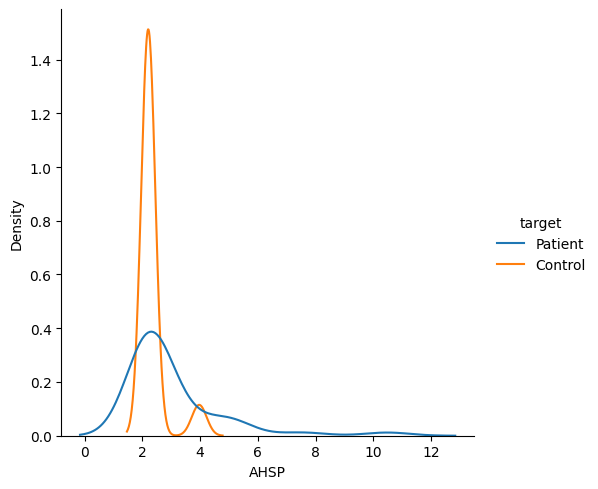

SOD2
Test normality:  4.01013480200163e-08 1.0153893725828311e-07
Patient:  3.2179999813953493
Control:  2.3961537
Test homogenius: LeveneResult(statistic=8.091438349079457, pvalue=0.005870506396523274)
Ttest_indResult(statistic=3.536390186821571, pvalue=0.0009077883365905941)


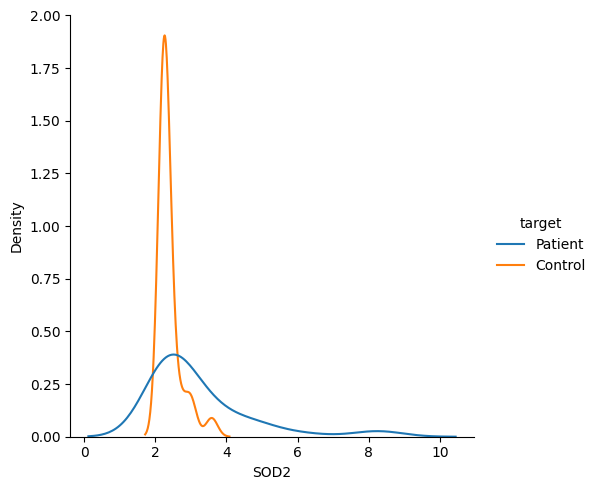

CXCL1
Test normality:  6.676675212702321e-08 3.0373205390787916e-06
Patient:  3.5456679395348836
Control:  2.7413593592592593
Test homogenius: LeveneResult(statistic=4.910359504667576, pvalue=0.030046389951293984)
Ttest_indResult(statistic=3.0314786396170907, pvalue=0.003701674324084818)


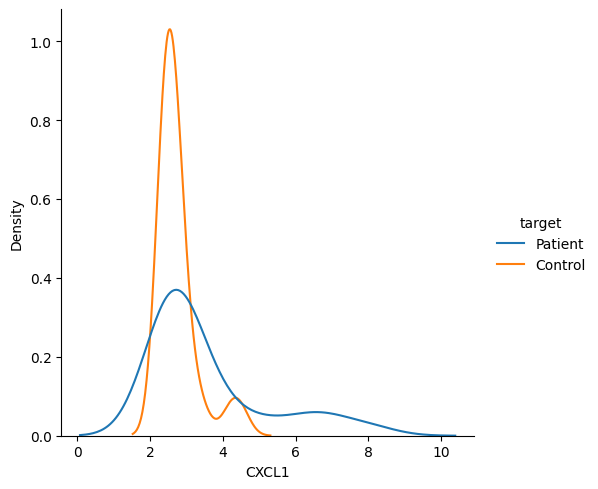

CFAP95
Test normality:  8.229985581920118e-08 4.206499149006504e-09
Patient:  3.3019145441860474
Control:  2.4711469444444445
Test homogenius: LeveneResult(statistic=6.218468404782158, pvalue=0.015080065040240861)
Ttest_indResult(statistic=2.921002735039607, pvalue=0.004855689660559124)


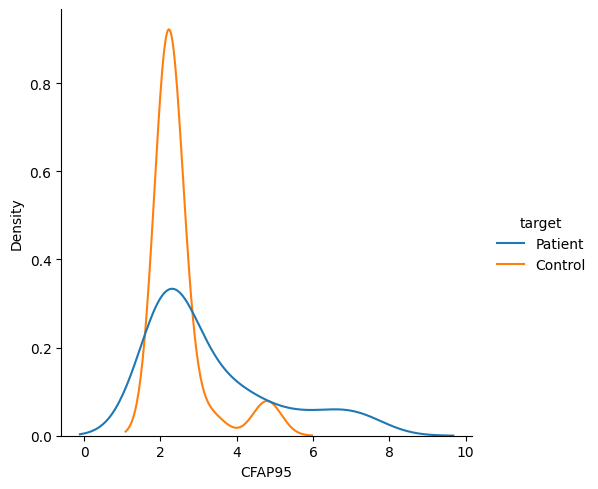

UTS2
Test normality:  1.6662858870475361e-09 4.3089136170237907e-07
Patient:  3.5239603418604655
Control:  3.1600613185185185
Test homogenius: LeveneResult(statistic=1.0710671287002977, pvalue=0.3043710689370497)
MannwhitneyuResult(statistic=504.5, pvalue=0.3607988943853996)


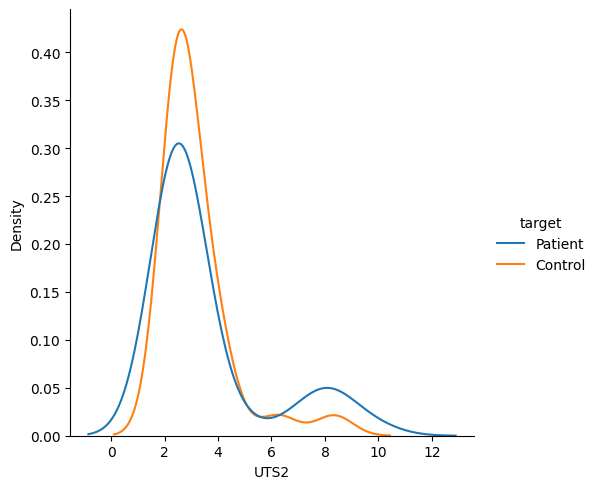

CA1
Test normality:  1.0608586009652754e-08 2.1707574404672414e-08
Patient:  4.1009146
Control:  3.118050740740741
Test homogenius: LeveneResult(statistic=5.746652196285885, pvalue=0.019273181102349303)
Ttest_indResult(statistic=2.738991781509729, pvalue=0.008465533778961748)


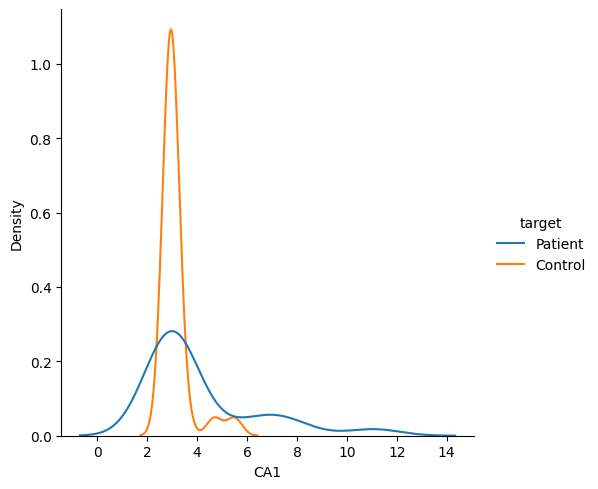

HLA-DRB4
Test normality:  7.424872364936164e-06 4.465911388251698e-06
Patient:  8.410689786046511
Control:  9.714905437037036
Test homogenius: LeveneResult(statistic=0.159597324293323, pvalue=0.690779542048189)
MannwhitneyuResult(statistic=518.0, pvalue=0.45434439026719886)


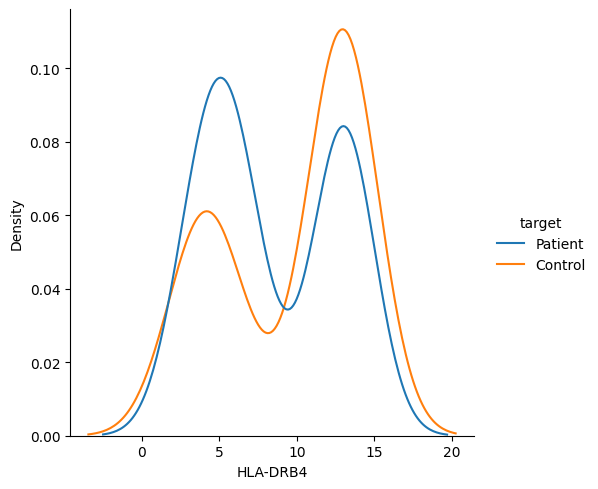

NEBL
Test normality:  2.82298007192594e-08 7.23737727525986e-08
Patient:  3.9695944953488365
Control:  2.986548718518518
Test homogenius: LeveneResult(statistic=3.4013717369374254, pvalue=0.06949861892849996)
MannwhitneyuResult(statistic=681.0, pvalue=0.1591556024527201)


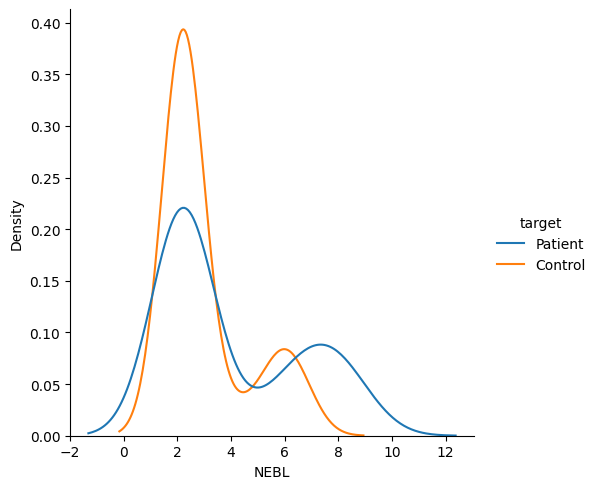

SCGB3A1
Test normality:  5.52491075112016e-09 1.975144868993084e-06
Patient:  4.1151730767441865
Control:  3.981250859259259
Test homogenius: LeveneResult(statistic=0.0813631226242468, pvalue=0.7763255897393863)
MannwhitneyuResult(statistic=606.5, pvalue=0.7568865845503265)


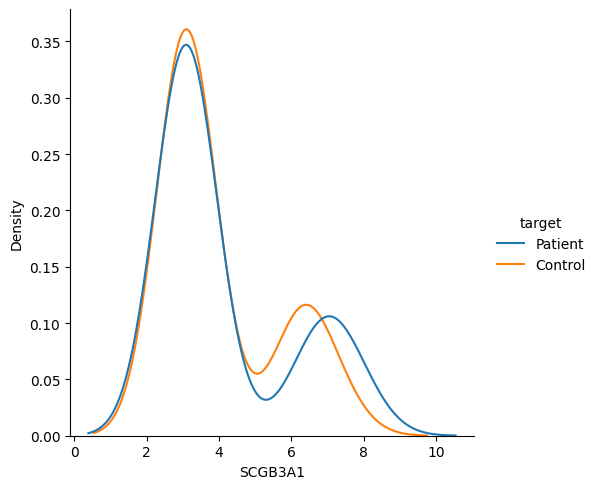

TACSTD2
Test normality:  1.0052070820165682e-06 2.0046384179295273e-06
Patient:  4.308453074418604
Control:  3.683986722222222
Test homogenius: LeveneResult(statistic=1.580110262710966, pvalue=0.21304536067341337)
MannwhitneyuResult(statistic=671.5, pvalue=0.2699874637357589)


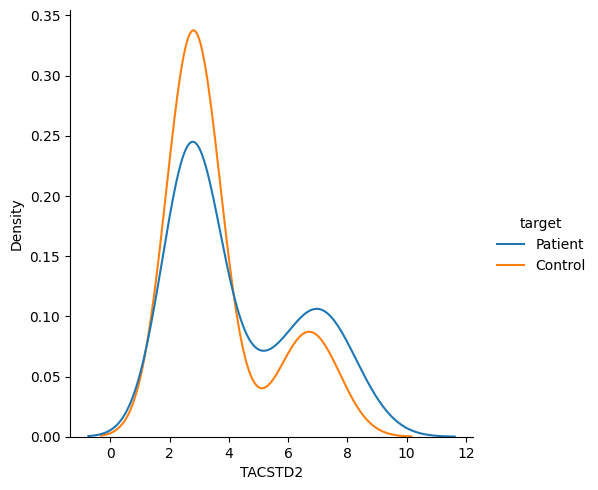

OLFM4
Test normality:  1.3048608707322273e-05 0.01057642325758934
Patient:  4.490592713953488
Control:  4.584237962962963
Test homogenius: LeveneResult(statistic=0.2998014906419131, pvalue=0.585799638400685)
MannwhitneyuResult(statistic=527.0, pvalue=0.52231601115928)


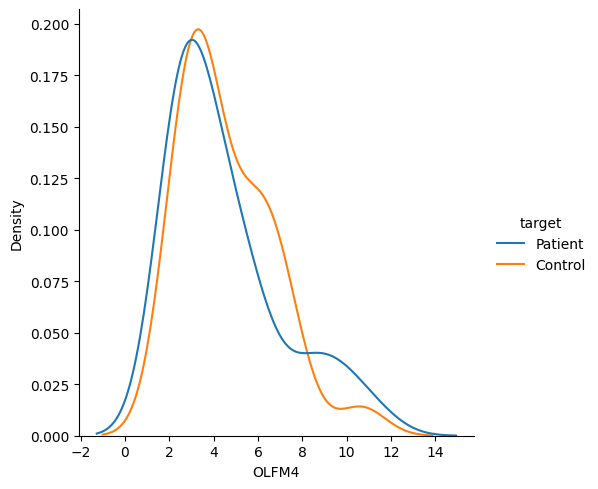

CRISP3
Test normality:  3.5334852555024554e-07 1.279497723771783e-06
Patient:  4.070661553488372
Control:  3.313196525925926
Test homogenius: LeveneResult(statistic=2.279186366362477, pvalue=0.13575353463731932)
MannwhitneyuResult(statistic=608.5, pvalue=0.737580623924653)


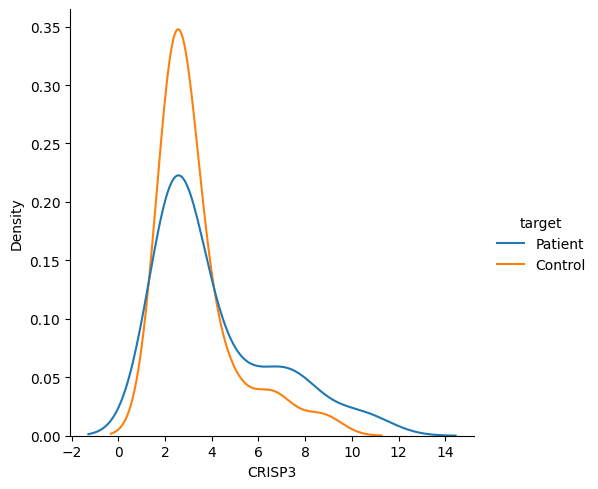

CXCL3
Test normality:  1.1738013339090969e-11 7.581856670269005e-11
Patient:  2.8483672627906973
Control:  2.2187938111111114
Test homogenius: LeveneResult(statistic=3.6327700343124603, pvalue=0.06088017375799458)
MannwhitneyuResult(statistic=762.0, pvalue=0.007980236397838219)


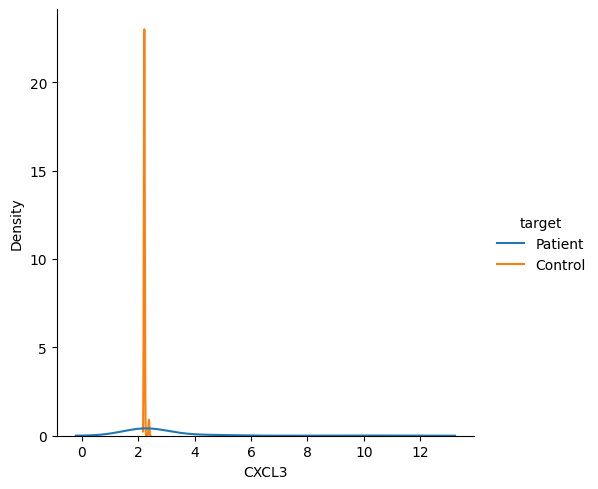

KRT1
Test normality:  1.4543316240178683e-07 2.127385556605077e-08
Patient:  3.2982457674418604
Control:  2.668282570370371
Test homogenius: LeveneResult(statistic=3.3373371441457267, pvalue=0.07211312479779367)
MannwhitneyuResult(statistic=652.0, pvalue=0.3905039662286397)


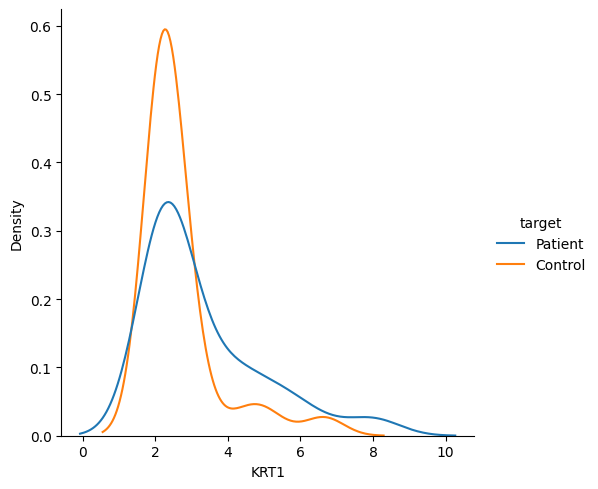

ZNF506
Test normality:  3.30723196384497e-07 3.231789236224358e-08
Patient:  3.5907008837209307
Control:  3.002144344444443
Test homogenius: LeveneResult(statistic=3.1032238832978334, pvalue=0.08263234595240304)
MannwhitneyuResult(statistic=715.5, pvalue=0.10413207855023543)


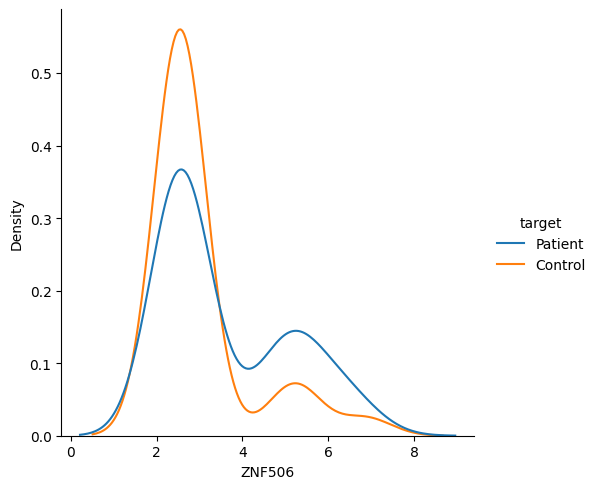

TMTC1
Test normality:  0.0005543400766327977 0.00012825573503505439
Patient:  4.21201176744186
Control:  3.9899400000000003
Test homogenius: LeveneResult(statistic=0.5502729268659382, pvalue=0.4607606780238849)
MannwhitneyuResult(statistic=628.5, pvalue=0.5642253702169987)


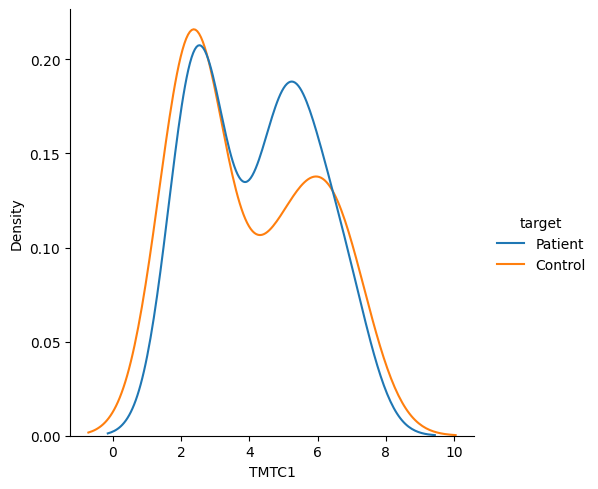

C17orf97
Test normality:  3.801097818723065e-06 0.00015784848073963076
Patient:  3.848643190697675
Control:  3.9252234370370362
Test homogenius: LeveneResult(statistic=0.10223747312530469, pvalue=0.7501412521156169)
MannwhitneyuResult(statistic=588.5, pvalue=0.9276845501674852)


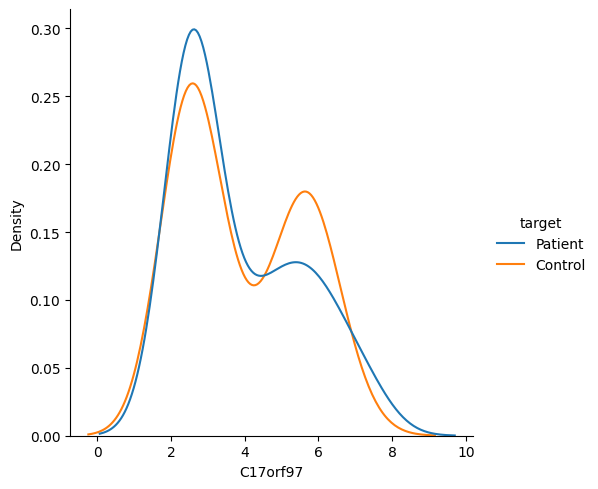

HLA-DRB1
Test normality:  1.2565293694422053e-08 2.174923793063499e-06
Patient:  4.827467232558139
Control:  4.943134477777778
Test homogenius: LeveneResult(statistic=0.016457993004798808, pvalue=0.898299162468871)
MannwhitneyuResult(statistic=558.0, pvalue=0.7845052939116229)


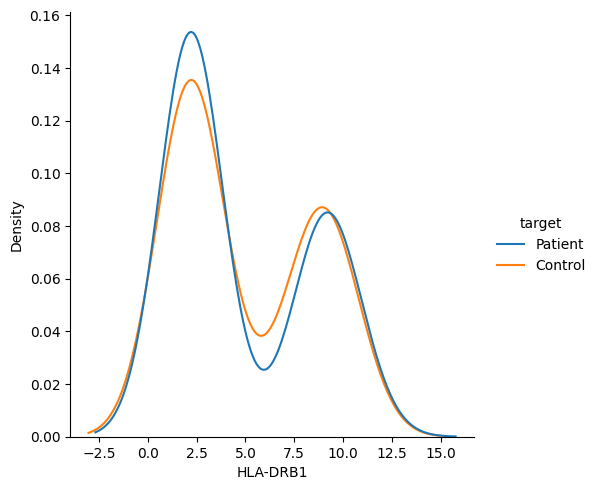

_______________________________________________
Time elapsed, s: 153
Start Schizo_filtered0.3_normalized, shape (72, 106)
model_name xgb, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
            

ROC AUC 10 folds: 0.7983333333333333 +- 0.19485749778862613 std
Accuracy 10 folds: 0.7696428571428572 +- 0.17024329828878698 std
F1 10 folds: 0.754098124098124 +- 0.19499817361516172 std
__________________________________________________________________________
model_name xgb, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=72)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None,...e,
         

ROC AUC 10 folds: 0.805 +- 0.10302372973683728 std
Accuracy 10 folds: 0.7267857142857143 +- 0.13970860710049035 std
F1 10 folds: 0.714126984126984 +- 0.14791415288549883 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectKBest(k=72)
Pipeline(steps=[('feature_selection', SelectKBest(k=72)),
                ('model', RandomForestClassifier())])
ROC AUC 10 folds: 0.7533333333333334 +- 0.17947454167962407 std
Accuracy 10 folds: 0.725 +- 0.14794510840862843 std
F1 10 folds: 0.7121572871572871 +- 0.15360803481954 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=57)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
         

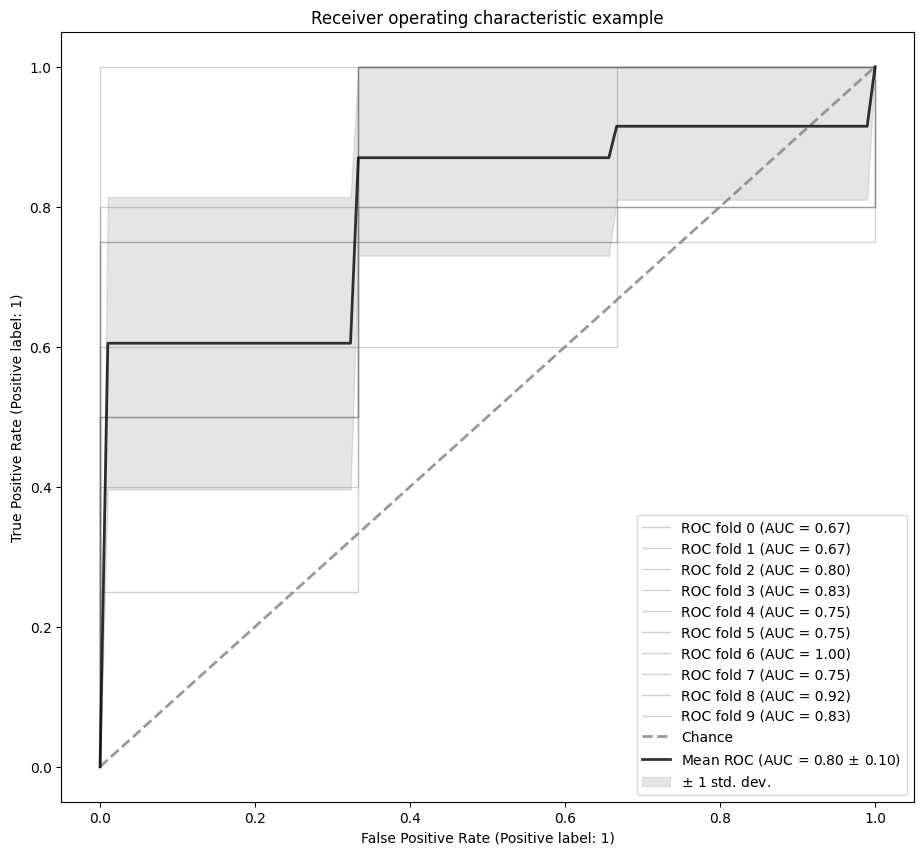

--------------------
______________stats___________________
PTGS2
Test normality:  1.23458517009567e-06 0.0003408843476790935
Patient:  4.01490143488372
Control:  2.7216119518518522
Test homogenius: LeveneResult(statistic=11.021635899500813, pvalue=0.0014503409113707667)
Ttest_indResult(statistic=3.7121616220676534, pvalue=0.0005524172331410339)


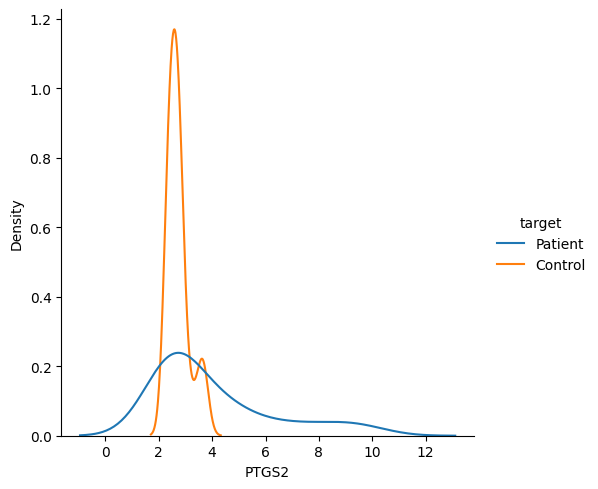

EGR3
Test normality:  3.791352128246217e-06 0.0010683570289984345
Patient:  4.309314302325581
Control:  3.283325996296296
Test homogenius: LeveneResult(statistic=11.396417817140168, pvalue=0.0012197993569298962)
Ttest_indResult(statistic=4.2463889726382575, pvalue=9.840174229317424e-05)


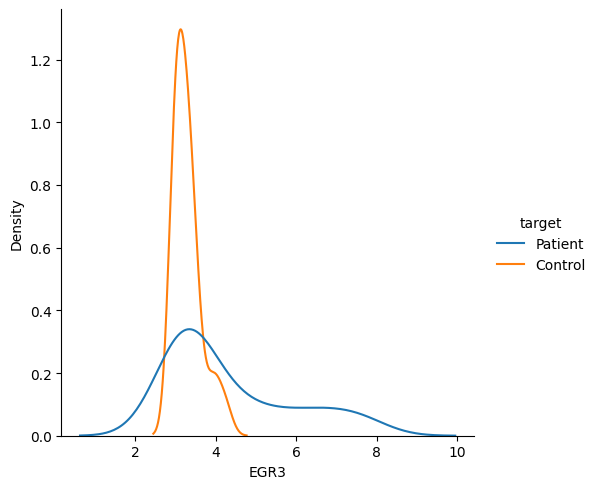

PSPH
Test normality:  5.34885566594312e-06 1.7297245449299226e-06
Patient:  7.555698769767442
Control:  5.834844907407408
Test homogenius: LeveneResult(statistic=4.29926870599698, pvalue=0.04191963665140165)
Ttest_indResult(statistic=2.865569252097562, pvalue=0.005619644943014291)


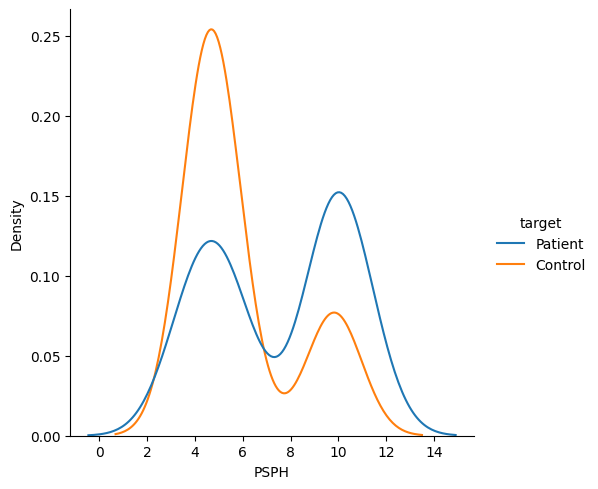

GNAL
Test normality:  4.290111732530022e-08 0.004044204019010067
Patient:  2.6154232255813956
Control:  3.490479496296296
Test homogenius: LeveneResult(statistic=20.86727293647074, pvalue=2.1305053440596275e-05)
Ttest_indResult(statistic=-3.453726420546467, pvalue=0.0015351573817831334)


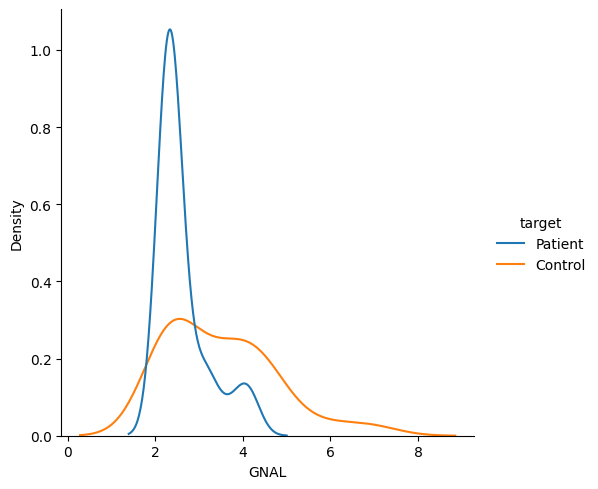

ADAMTS1
Test normality:  0.13204599916934967 0.5130916237831116
Patient:  3.849781976744186
Control:  4.8689576481481485
MannwhitneyuResult(statistic=337.5, pvalue=0.0034288601081867817)


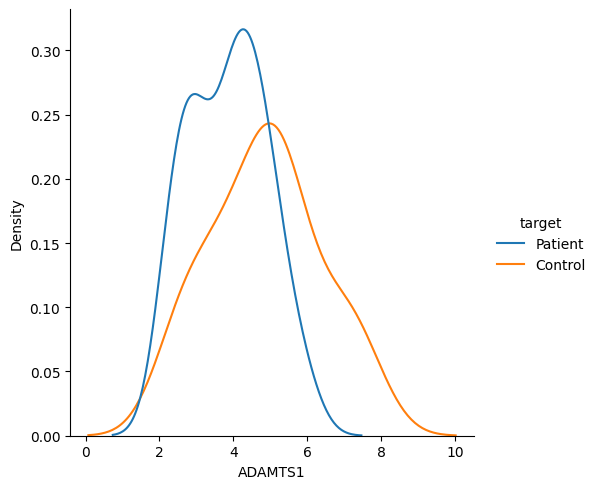

SOD2
Test normality:  4.01013480200163e-08 1.0153893725828311e-07
Patient:  3.2179999813953493
Control:  2.3961537
Test homogenius: LeveneResult(statistic=8.091438349079457, pvalue=0.005870506396523274)
Ttest_indResult(statistic=3.536390186821571, pvalue=0.0009077883365905941)


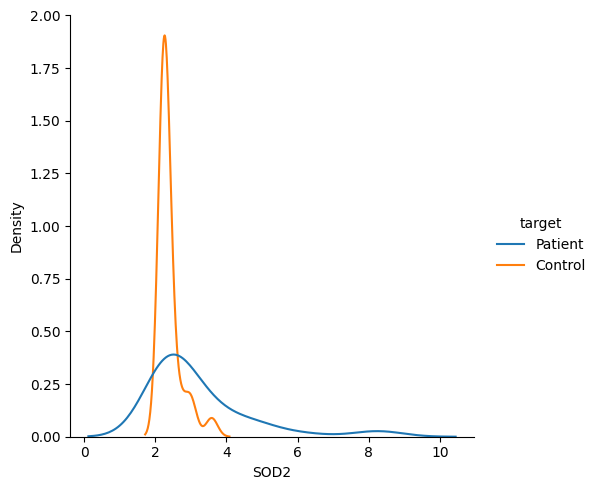

CXCL2
Test normality:  0.052007317543029785 0.0700131356716156
Patient:  6.672296299999998
Control:  4.965429588888889
MannwhitneyuResult(statistic=848.0, pvalue=0.001270755499233463)


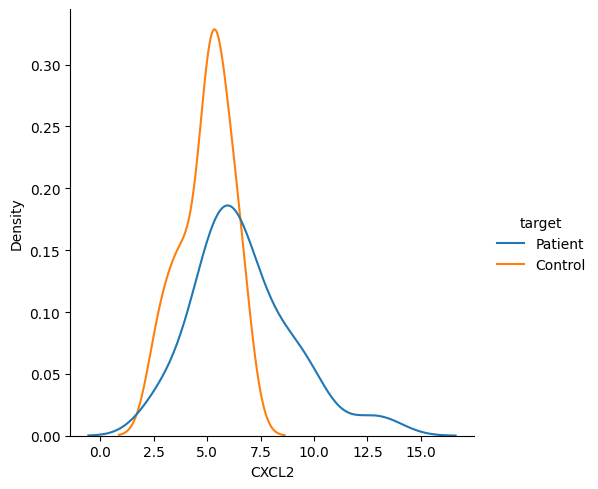

ORM1
Test normality:  2.717461811130306e-08 1.7169306829600828e-06
Patient:  3.1727637023255815
Control:  2.8545830296296293
Test homogenius: LeveneResult(statistic=2.4277571076094007, pvalue=0.12384563914927367)
MannwhitneyuResult(statistic=592.5, pvalue=0.8885410265672959)


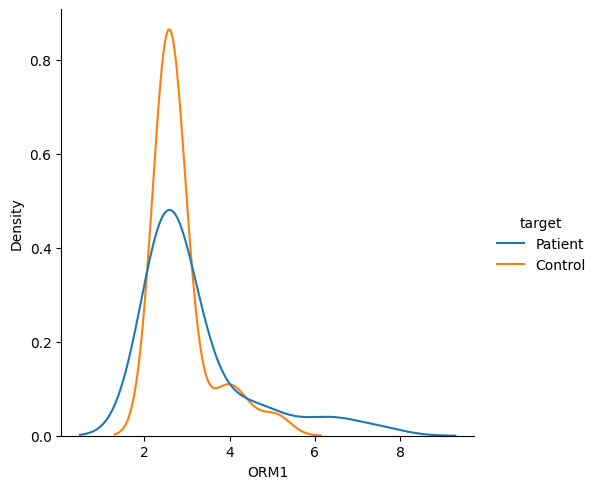

HLA-DQA1
Test normality:  3.433357154136729e-09 0.944724440574646
Patient:  10.901447197674418
Control:  11.23630411111111
MannwhitneyuResult(statistic=667.0, pvalue=0.2994240205857863)


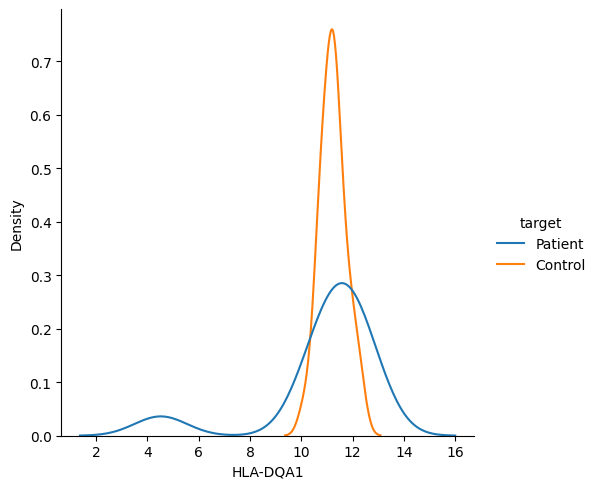

LINC01505
Test normality:  1.638299391981679e-11 3.3012081985361874e-05
Patient:  2.4544471930232556
Control:  3.072736340740741
Test homogenius: LeveneResult(statistic=10.899066728461303, pvalue=0.0015352184752394093)
Ttest_indResult(statistic=-2.8173042720620747, pvalue=0.0078093287917284804)


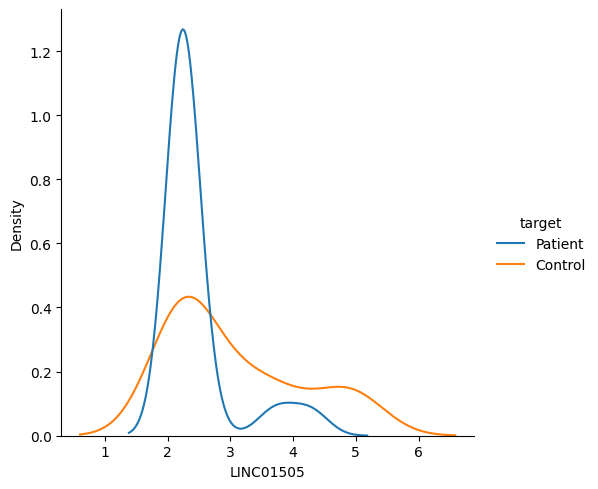

AHSP
Test normality:  4.773644257660692e-10 3.3755659378797986e-10
Patient:  3.0200753674418603
Control:  2.3372896555555553
Test homogenius: LeveneResult(statistic=4.31054427042546, pvalue=0.041659776172318023)
Ttest_indResult(statistic=2.531472874995258, pvalue=0.014418556572305221)


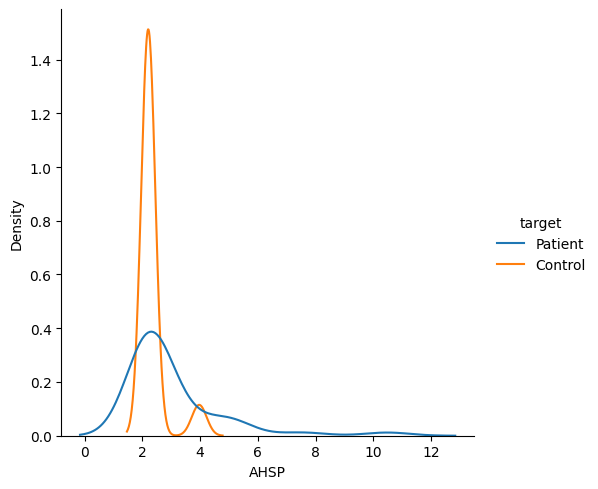

DSP
Test normality:  0.00037341468851082027 0.000349908514181152
Patient:  3.9619922162790697
Control:  3.5871083111111113
Test homogenius: LeveneResult(statistic=0.5489889828300011, pvalue=0.46128211866356894)
MannwhitneyuResult(statistic=655.0, pvalue=0.37083186475733065)


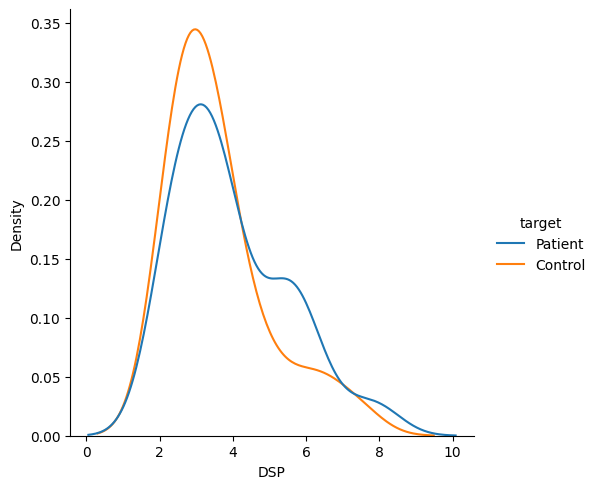

KRT1
Test normality:  1.4543316240178683e-07 2.127385556605077e-08
Patient:  3.2982457674418604
Control:  2.668282570370371
Test homogenius: LeveneResult(statistic=3.3373371441457267, pvalue=0.07211312479779367)
MannwhitneyuResult(statistic=652.0, pvalue=0.3905039662286397)


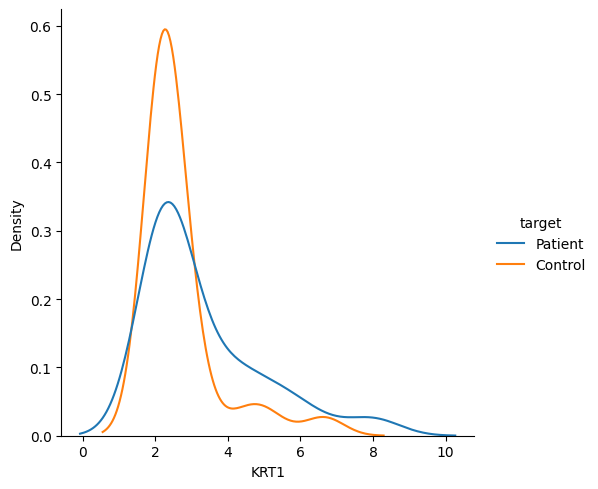

TACSTD2
Test normality:  1.0052070820165682e-06 2.0046384179295273e-06
Patient:  4.308453074418604
Control:  3.683986722222222
Test homogenius: LeveneResult(statistic=1.580110262710966, pvalue=0.21304536067341337)
MannwhitneyuResult(statistic=671.5, pvalue=0.2699874637357589)


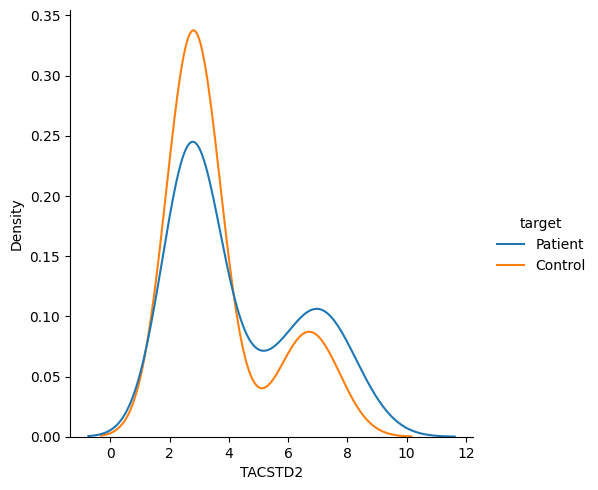

CRISP3
Test normality:  3.5334852555024554e-07 1.279497723771783e-06
Patient:  4.070661553488372
Control:  3.313196525925926
Test homogenius: LeveneResult(statistic=2.279186366362477, pvalue=0.13575353463731932)
MannwhitneyuResult(statistic=608.5, pvalue=0.737580623924653)


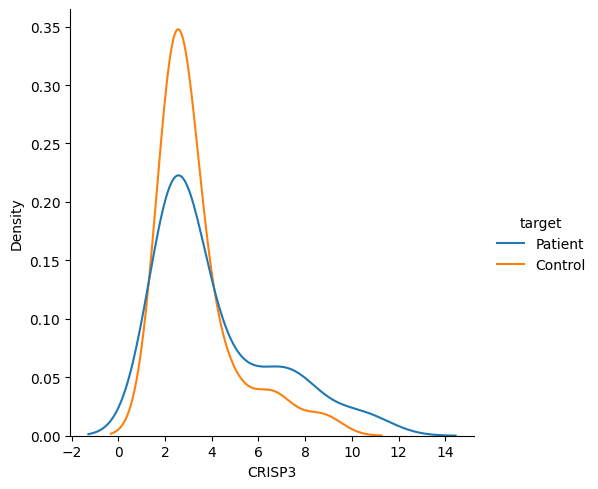

FAM157C
Test normality:  2.170345847485322e-10 1.1287075718513506e-09
Patient:  2.6223490093023254
Control:  2.460551496296296
Test homogenius: LeveneResult(statistic=0.6548604758210921, pvalue=0.4212028144590455)
MannwhitneyuResult(statistic=688.5, pvalue=0.17025436603442146)


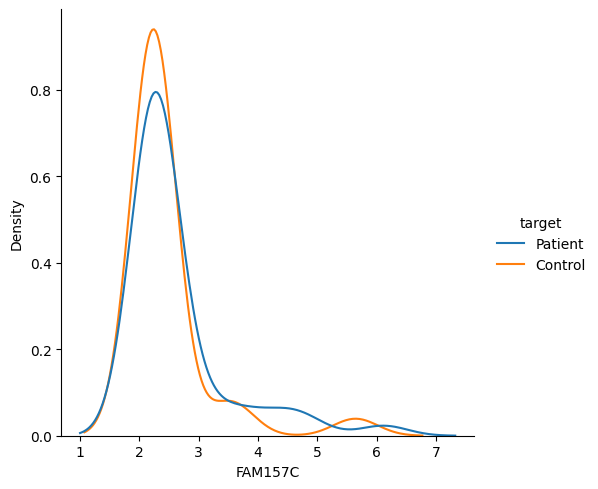

CEACAM1
Test normality:  5.898228433443009e-11 1.0932548200059955e-09
Patient:  2.6925375930232556
Control:  2.3320741111111114
Test homogenius: LeveneResult(statistic=2.3475838737908976, pvalue=0.13011681020610433)
MannwhitneyuResult(statistic=615.0, pvalue=0.627885657642114)


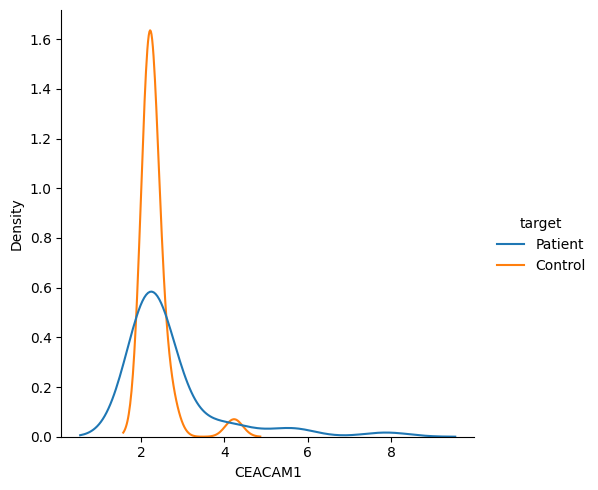

NRG1
Test normality:  0.0001456855534343049 0.00026052960311062634
Patient:  3.6567819372093027
Control:  2.9990866592592593
Test homogenius: LeveneResult(statistic=7.20952010676968, pvalue=0.009102561394489637)
Ttest_indResult(statistic=2.858083008966509, pvalue=0.005655825539851097)


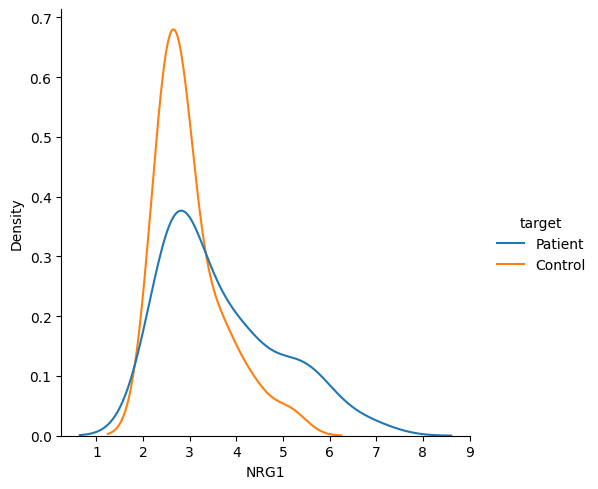

FAM118A
Test normality:  8.106521818262991e-07 0.0001574163616169244
Patient:  4.766932562790697
Control:  5.63033568888889
Test homogenius: LeveneResult(statistic=2.635648939020494, pvalue=0.10911653070102041)
MannwhitneyuResult(statistic=369.5, pvalue=0.010892028807454612)


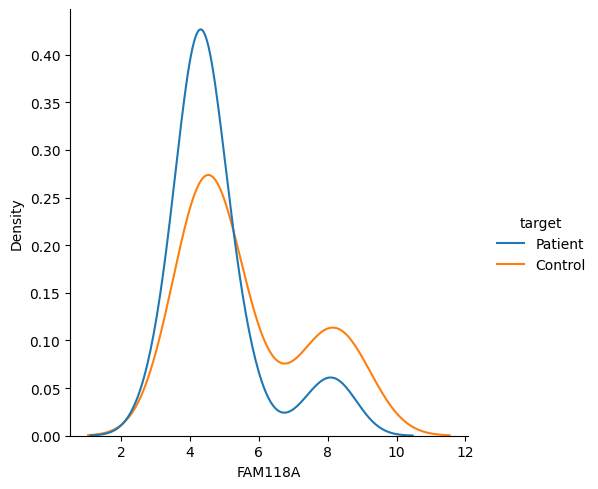

SLC4A1
Test normality:  6.944903674366287e-08 1.577399962116033e-05
Patient:  5.1654625139534875
Control:  4.437387348148148
Test homogenius: LeveneResult(statistic=3.844276688841401, pvalue=0.054013819416040505)
MannwhitneyuResult(statistic=660.0, pvalue=0.34029034277671955)


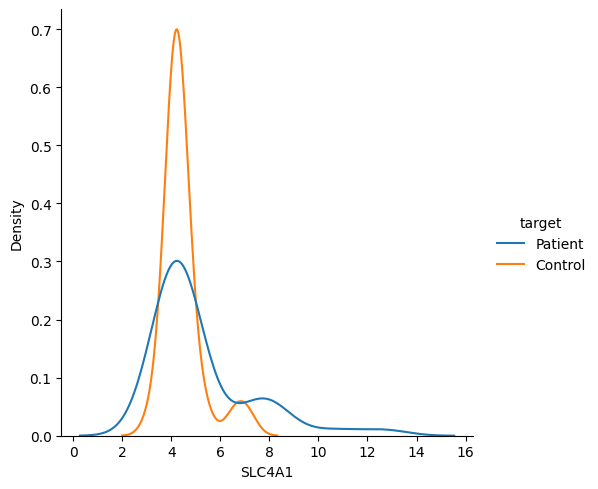

_______________________________________________
Time elapsed, s: 1673
Start Schizo_filtered0.2_normalized, shape (72, 387)
model_name xgb, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
           

ROC AUC 10 folds: 0.6950000000000001 +- 0.1869417615788998 std
Accuracy 10 folds: 0.6982142857142857 +- 0.17793637076442895 std
F1 10 folds: 0.675530303030303 +- 0.18855959149278012 std
__________________________________________________________________________
model_name xgb, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=72)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None,...e,
          

ROC AUC 10 folds: 0.8866666666666667 +- 0.12378296418418093 std
Accuracy 10 folds: 0.8232142857142858 +- 0.11640063205523045 std
F1 10 folds: 0.7870726495726496 +- 0.1709319242134683 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectKBest(k=72)
Pipeline(steps=[('feature_selection', SelectKBest(k=72)),
                ('model', RandomForestClassifier())])
ROC AUC 10 folds: 0.8666666666666668 +- 0.13102162671355697 std
Accuracy 10 folds: 0.8357142857142856 +- 0.1491472358415793 std
F1 10 folds: 0.8211111111111112 +- 0.1630070437014803 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=57)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifie

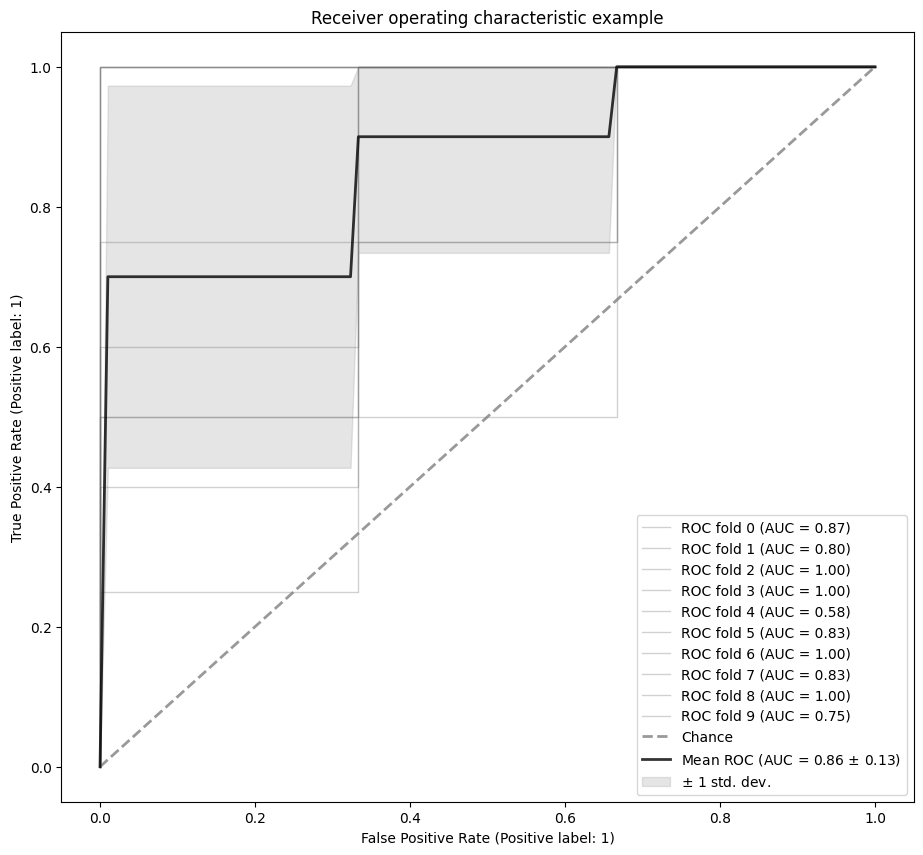

--------------------
______________stats___________________
EIF4G3
Test normality:  0.000609247712418437 2.4551741262257565e-06
Patient:  3.5272004209302326
Control:  2.8543792666666667
Test homogenius: LeveneResult(statistic=23.178537741024, pvalue=8.58625340206868e-06)
Ttest_indResult(statistic=4.105221318934481, pvalue=0.00011892793417118138)


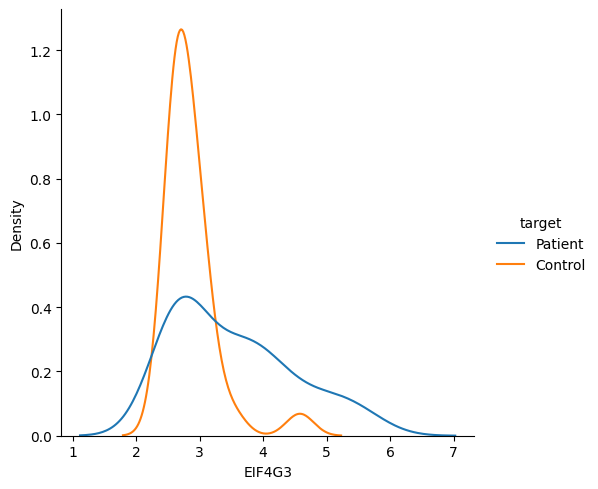

SOD2
Test normality:  4.01013480200163e-08 1.0153893725828311e-07
Patient:  3.2179999813953493
Control:  2.3961537
Test homogenius: LeveneResult(statistic=8.091438349079457, pvalue=0.005870506396523274)
Ttest_indResult(statistic=3.536390186821571, pvalue=0.0009077883365905941)


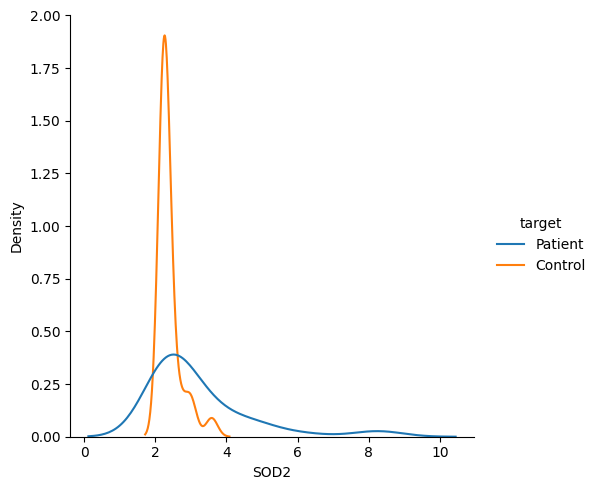

PSPH
Test normality:  5.34885566594312e-06 1.7297245449299226e-06
Patient:  7.555698769767442
Control:  5.834844907407408
Test homogenius: LeveneResult(statistic=4.29926870599698, pvalue=0.04191963665140165)
Ttest_indResult(statistic=2.865569252097562, pvalue=0.005619644943014291)


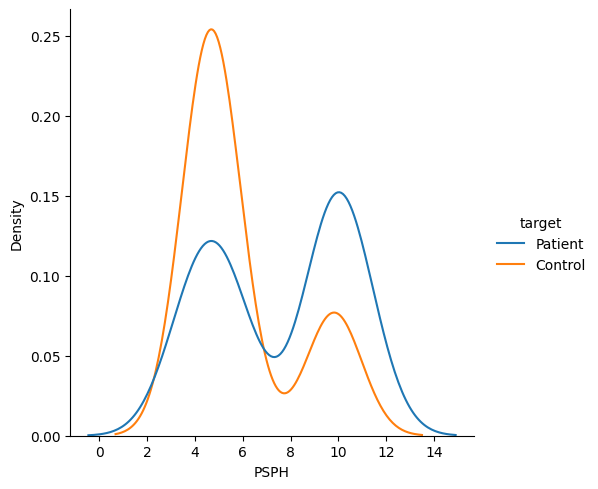

COL19A1
Test normality:  0.0018656111788004637 0.00012954181875102222
Patient:  3.167283106976744
Control:  2.6720684074074077
Test homogenius: LeveneResult(statistic=12.697203270203998, pvalue=0.0006748443141674942)
Ttest_indResult(statistic=3.872612888204429, pvalue=0.00024662108376989394)


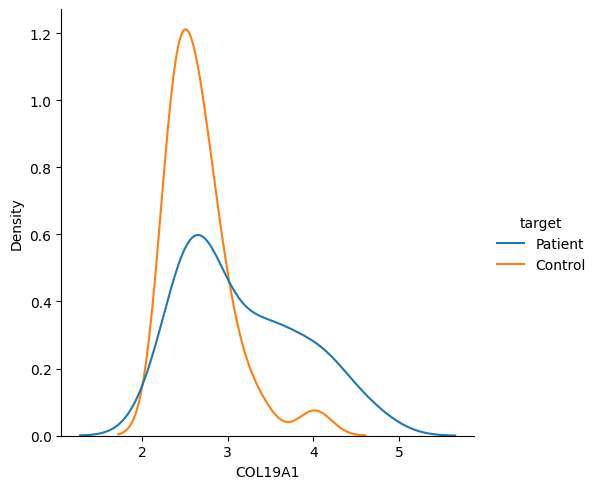

NR4A2
Test normality:  0.014398068189620972 0.3640642762184143
Patient:  6.64279888372093
Control:  6.0345665814814815
MannwhitneyuResult(statistic=673.5, pvalue=0.2643718964573404)


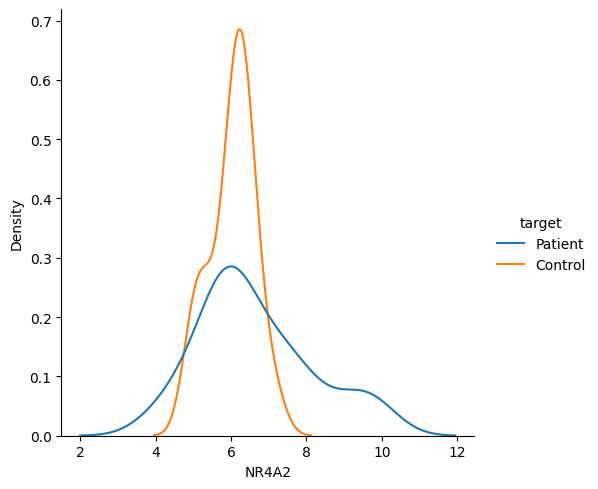

CXCL2
Test normality:  0.052007317543029785 0.0700131356716156
Patient:  6.672296299999998
Control:  4.965429588888889
MannwhitneyuResult(statistic=848.0, pvalue=0.001270755499233463)


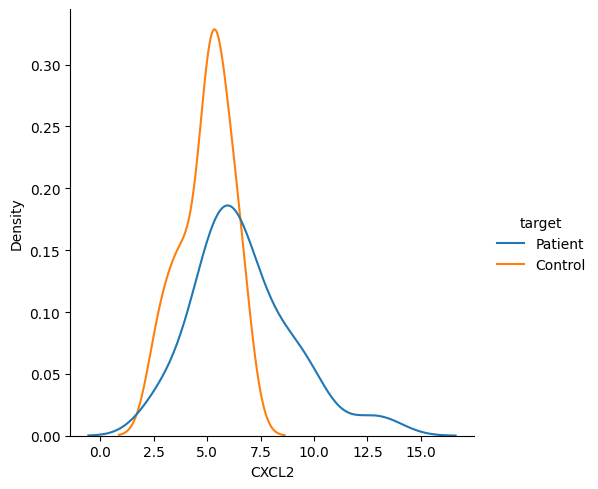

RHOBTB3
Test normality:  0.09950371086597443 0.22339630126953125
Patient:  3.834864641860465
Control:  4.819219522222222
MannwhitneyuResult(statistic=287.5, pvalue=0.00041464973639240946)


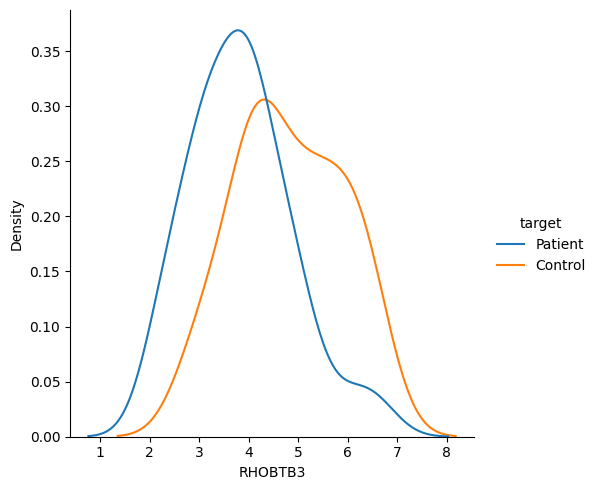

S1PR5
Test normality:  0.20173431932926178 0.50941401720047
Patient:  4.25695835116279
Control:  5.100115118518518
MannwhitneyuResult(statistic=275.0, pvalue=0.00022933283761238172)


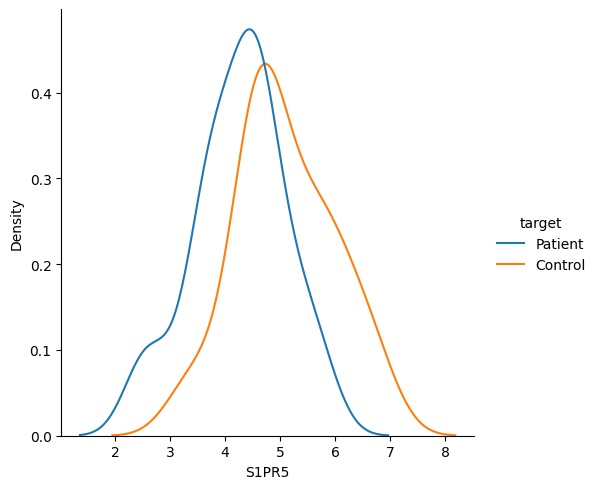

FAM118A
Test normality:  8.106521818262991e-07 0.0001574163616169244
Patient:  4.766932562790697
Control:  5.63033568888889
Test homogenius: LeveneResult(statistic=2.635648939020494, pvalue=0.10911653070102041)
MannwhitneyuResult(statistic=369.5, pvalue=0.010892028807454612)


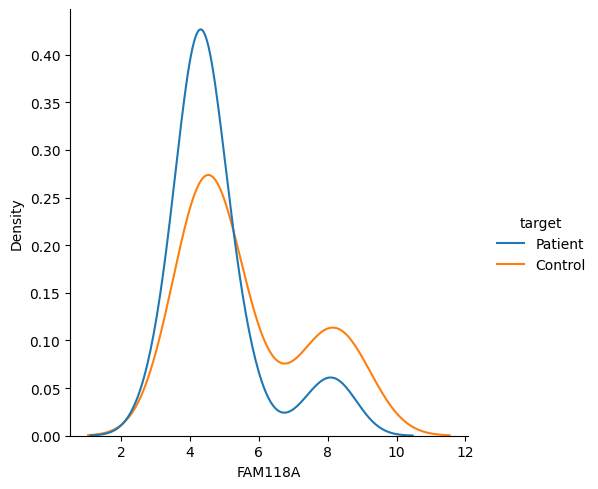

PTGDR
Test normality:  0.03471497818827629 0.1737246811389923
Patient:  5.470389923255814
Control:  6.309754662962965
MannwhitneyuResult(statistic=338.0, pvalue=0.003496248922005718)


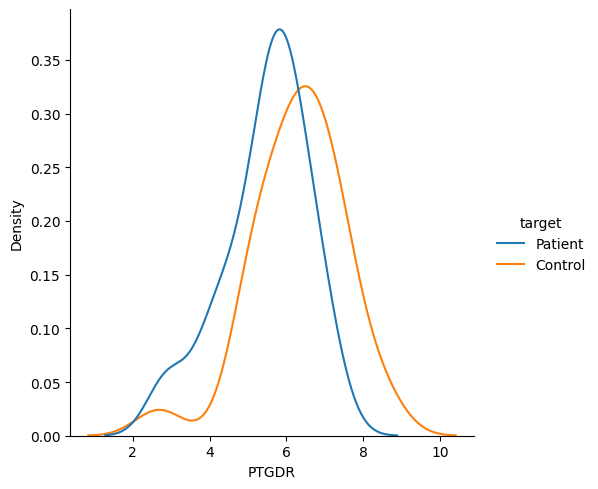

EGR3
Test normality:  3.791352128246217e-06 0.0010683570289984345
Patient:  4.309314302325581
Control:  3.283325996296296
Test homogenius: LeveneResult(statistic=11.396417817140168, pvalue=0.0012197993569298962)
Ttest_indResult(statistic=4.2463889726382575, pvalue=9.840174229317424e-05)


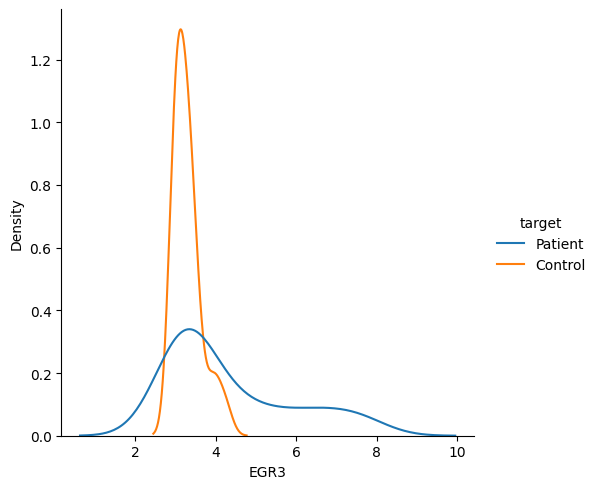

CXCL8
Test normality:  0.1876080483198166 0.03783424571156502
Patient:  9.392813023255814
Control:  7.856706485185185
MannwhitneyuResult(statistic=809.0, pvalue=0.005942559792716831)


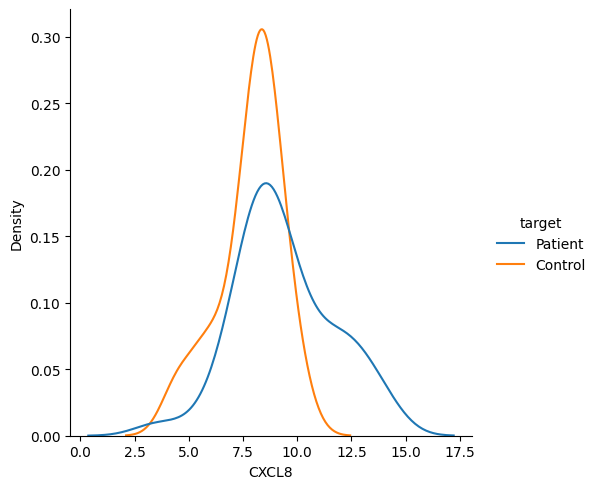

GNAL
Test normality:  4.290111732530022e-08 0.004044204019010067
Patient:  2.6154232255813956
Control:  3.490479496296296
Test homogenius: LeveneResult(statistic=20.86727293647074, pvalue=2.1305053440596275e-05)
Ttest_indResult(statistic=-3.453726420546467, pvalue=0.0015351573817831334)


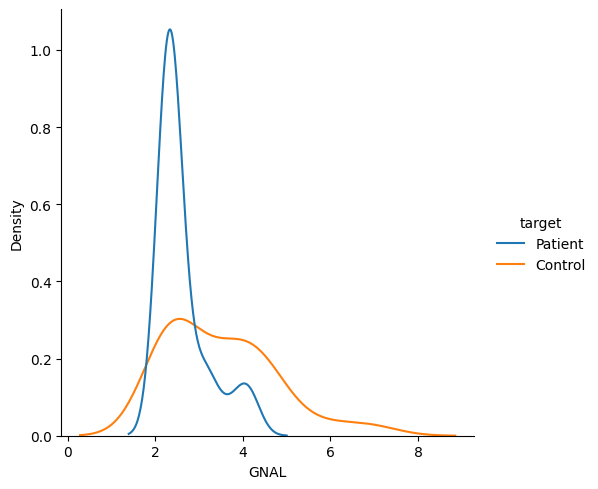

NLRP2
Test normality:  0.030810264870524406 0.009001064114272594
Patient:  4.048187674418605
Control:  4.968487251851853
Test homogenius: LeveneResult(statistic=0.6293715418595015, pvalue=0.4303454549173009)
MannwhitneyuResult(statistic=335.0, pvalue=0.003087689555211735)


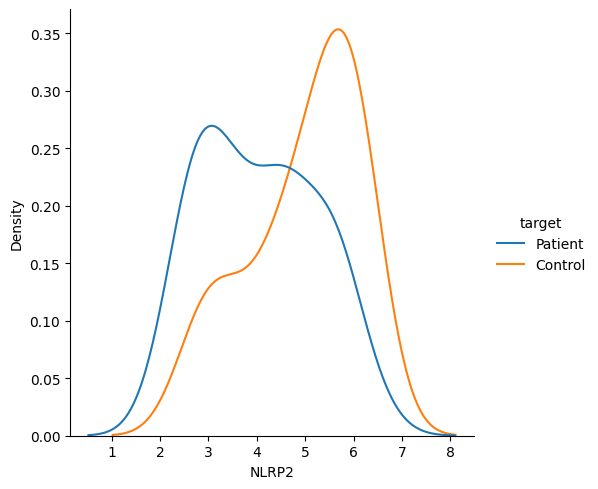

AHSP
Test normality:  4.773644257660692e-10 3.3755659378797986e-10
Patient:  3.0200753674418603
Control:  2.3372896555555553
Test homogenius: LeveneResult(statistic=4.31054427042546, pvalue=0.041659776172318023)
Ttest_indResult(statistic=2.531472874995258, pvalue=0.014418556572305221)


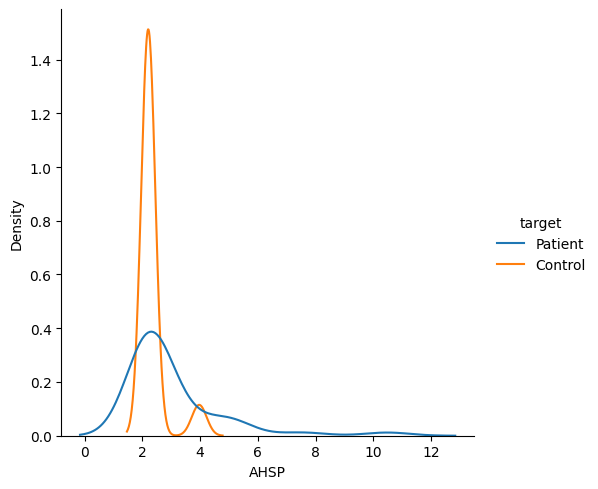

ETNK1
Test normality:  4.850520554100513e-07 6.792976137148798e-07
Patient:  2.886612186046512
Control:  2.5200963481481478
Test homogenius: LeveneResult(statistic=7.002389119946179, pvalue=0.010104334311210507)
Ttest_indResult(statistic=3.377858982611574, pvalue=0.0013235576802650148)


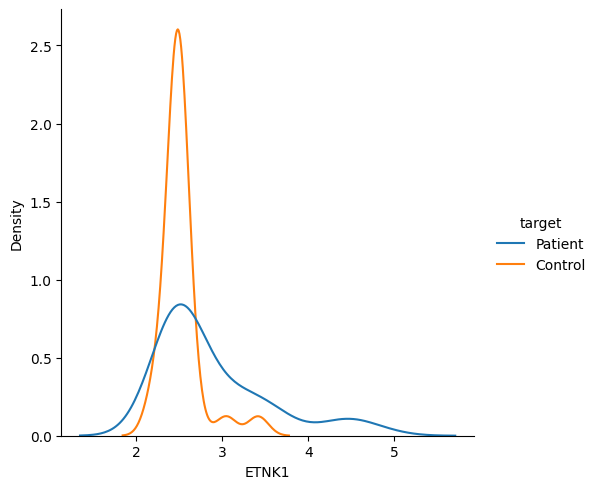

ENPP5
Test normality:  0.0016358911525458097 0.3146377205848694
Patient:  3.8522278720930228
Control:  4.464780644444444
MannwhitneyuResult(statistic=364.0, pvalue=0.008931947961275515)


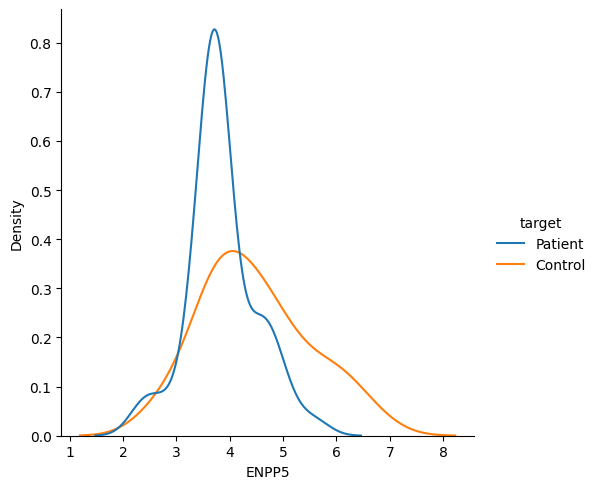

ANKRD36BP2
Test normality:  0.14716024696826935 0.050310660153627396
Patient:  4.310860972093024
Control:  3.7103065592592595
MannwhitneyuResult(statistic=787.5, pvalue=0.012661879527776374)


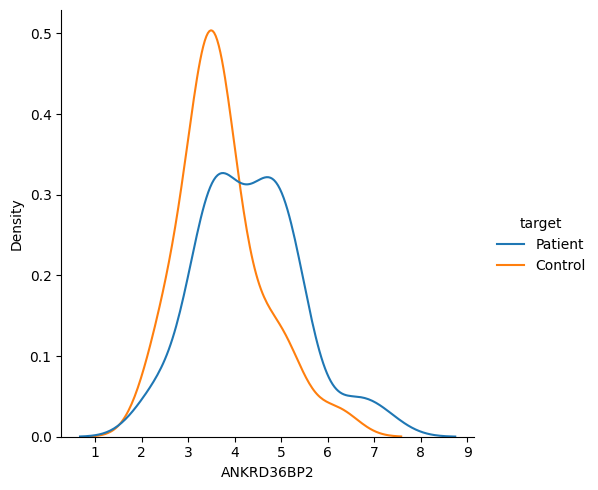

SLC8A1
Test normality:  0.00038760443567298353 3.5438556551525835e-06
Patient:  3.3903011883720926
Control:  2.994530422222222
Test homogenius: LeveneResult(statistic=1.7992040897739077, pvalue=0.18427158955158227)
MannwhitneyuResult(statistic=773.0, pvalue=0.020480444371664557)


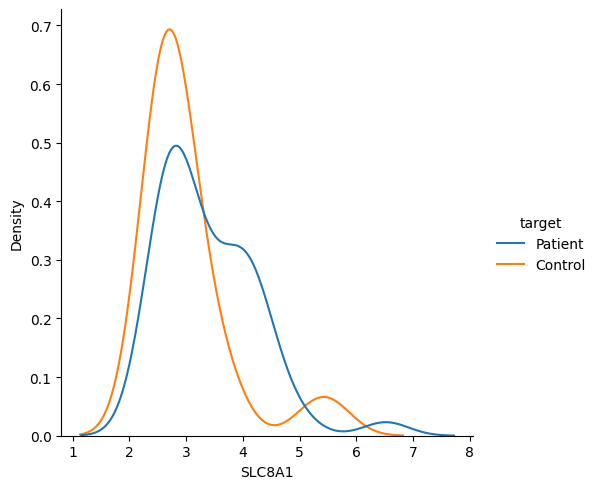

CSNK2A1
Test normality:  0.07690757513046265 0.44716042280197144
Patient:  3.490167874418604
Control:  4.055287329629629
MannwhitneyuResult(statistic=335.0, pvalue=0.0031126945682889784)


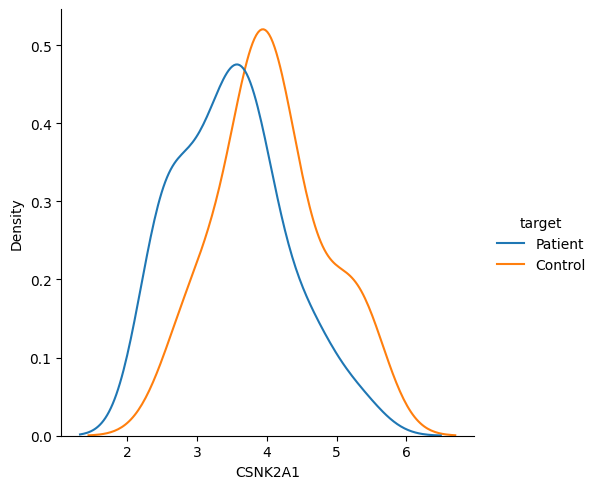

_______________________________________________
Time elapsed, s: 2549
Start Schizo_filtered0.1_normalized, shape (72, 2503)
model_name xgb, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
          

ROC AUC 10 folds: 0.7633333333333334 +- 0.18764623926716759 std
Accuracy 10 folds: 0.7535714285714286 +- 0.16633044317421453 std
F1 10 folds: 0.7359920634920634 +- 0.17658989208016082 std
__________________________________________________________________________
model_name xgb, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=72)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None,...e,
        

ROC AUC 10 folds: 0.7941666666666667 +- 0.160080275001152 std
Accuracy 10 folds: 0.7124999999999999 +- 0.1606051216556957 std
F1 10 folds: 0.6948556998556998 +- 0.16790513928496836 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectKBest(k=72)
Pipeline(steps=[('feature_selection', SelectKBest(k=72)),
                ('model', RandomForestClassifier())])
ROC AUC 10 folds: 0.8266666666666665 +- 0.17387735140993302 std
Accuracy 10 folds: 0.7374999999999999 +- 0.14420126595158872 std
F1 10 folds: 0.7196031746031746 +- 0.14571741965022153 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=57)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifie

AttributeError: 'PCA' object has no attribute 'get_support'

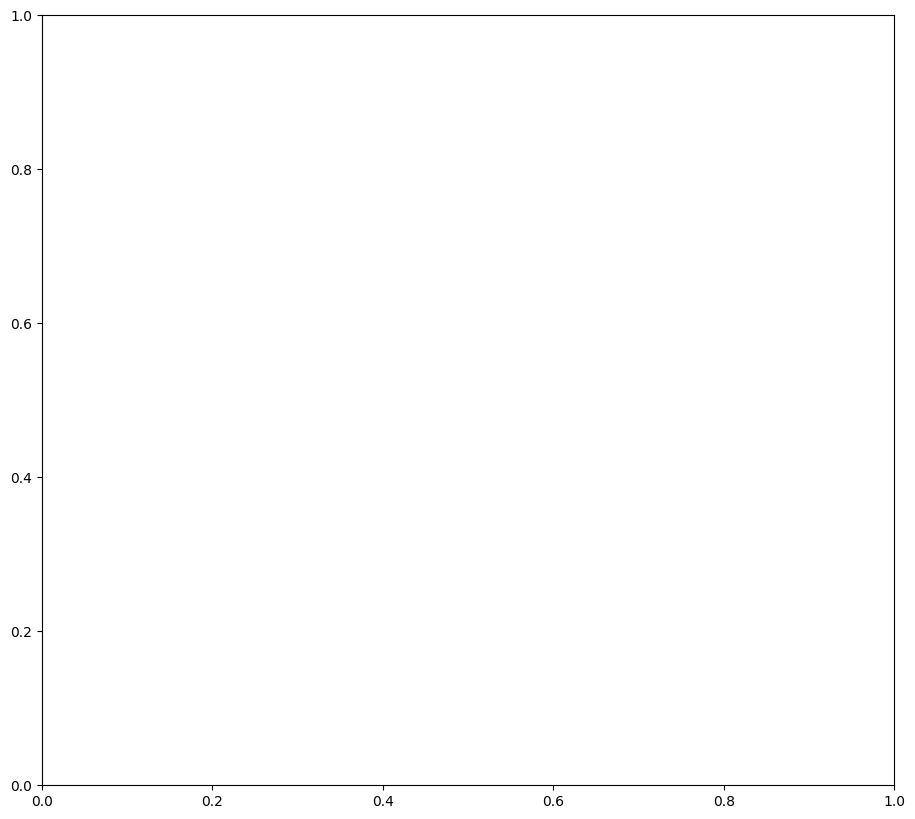

In [39]:
results_dict_metrics = {}
results_dict_f1 = {}

for fname in filtered:
    X,y,_ = processed[fname]
    print(f'Start {fname}, shape {X.shape}')
    

    start = datetime.now()
    
    best_result, best_f1 = experiments.run(X, y, experiment_name=fname, repeats=1, topN=1, scaling=False)
    results_dict_f1[fname] = best_f1
    results_dict_metrics[fname] = best_result
    
    end = datetime.now()
    print(f'Time elapsed, s: {(end-start).seconds}')

In [126]:
results_dict_f1

{'Schizo_filtered0.6_normalized': 0.5961688311688311,
 'Schizo_filtered0.5_normalized': 0.6678174603174604,
 'Schizo_filtered0.4_normalized': 0.7100396825396826,
 'Schizo_filtered0.3_normalized': 0.7675541125541125,
 'Schizo_filtered0.2_normalized': 0.8211111111111112}

----

model_name xgb, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
   

ROC AUC 10 folds: 0.6766666666666666 +- 0.26014952965127147 std
Accuracy 10 folds: 0.7303571428571429 +- 0.21553948688851252 std
F1 10 folds: 0.7117965367965369 +- 0.23974069357832922 std
model: model_name xgb, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=72), time elapsed: 0:03:56
__________________________________________________________________________
model_name xgb, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=57)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=57)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                            

ROC AUC 10 folds: 0.7016666666666667 +- 0.20755855934062453 std
Accuracy 10 folds: 0.6714285714285714 +- 0.1507210560429228 std
F1 10 folds: 0.6618398268398267 +- 0.15368394942813612 std
model: model_name svm, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=72), time elapsed: 0:00:27
__________________________________________________________________________
model_name svm, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=57)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=57)),
                ('model', SVC())])
ROC AUC 10 folds: 0.72 +- 0.20273134932713294 std
Accuracy 10 folds: 0.6946428571428571 +- 0.17649687804373107 std
F1 10 folds: 0.6648809523809524 +- 0.20248124265748155 std
mo

ROC AUC 10 folds: 0.8150000000000001 +- 0.20742468512691536 std
Accuracy 10 folds: 0.7267857142857143 +- 0.17277189456338207 std
F1 10 folds: 0.7233333333333333 +- 0.17397685284622968 std
model: model_name lr, feature_selection_method SelectKBest(k='all'), time elapsed: 0:00:38
__________________________________________________________________________
model_name lr, feature_selection_method SelectKBest(k=57)
Pipeline(steps=[('feature_selection', SelectKBest(k=57)),
                ('model', LogisticRegression())])
ROC AUC 10 folds: 0.7983333333333333 +- 0.13238202294873727 std
Accuracy 10 folds: 0.6982142857142857 +- 0.10608104814485102 std
F1 10 folds: 0.6679906204906204 +- 0.1435157976712906 std
model: model_name lr, feature_selection_method SelectKBest(k=57), time elapsed: 0:00:12
__________________________________________________________________________
model_name lr, feature_selection_method SelectKBest(k=72)
Pipeline(steps=[('feature_selection', SelectKBest(k=72)),
              

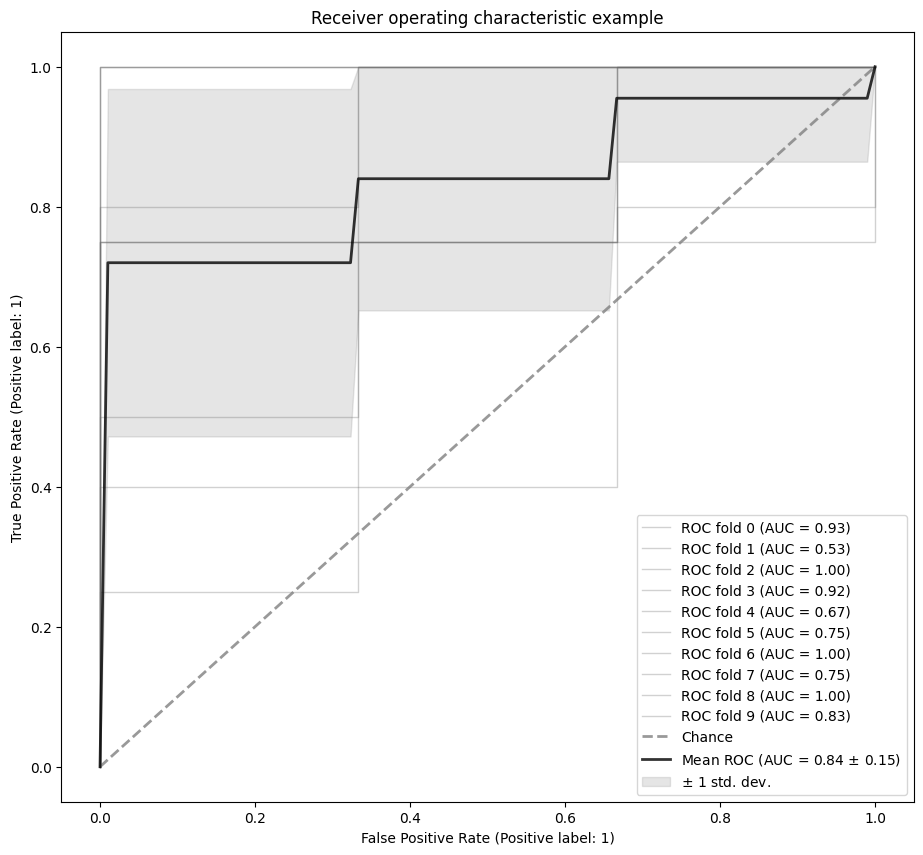

--------------------
Dimension reduction was applied, no original features were selected, hence no stats on those features


In [168]:
name = 'Schizo_filtered0.1_normalized'
best_result, best_f1 = autoNeuro.experiments.run(
    processed[name][0],
    processed[name][1],
    experiment_name=name,
    repeats=1,
    topN=1,
    scaling=False,
    plot_density=False,
)

In [169]:
results_dict_f1[name] = best_f1
results_dict_metrics[name] = best_result

In [173]:
results_dict_f1

{'Schizo_filtered0.6_normalized': 0.5961688311688311,
 'Schizo_filtered0.5_normalized': 0.6678174603174604,
 'Schizo_filtered0.4_normalized': 0.7100396825396826,
 'Schizo_filtered0.3_normalized': 0.7675541125541125,
 'Schizo_filtered0.2_normalized': 0.8211111111111112,
 'Schizo_filtered0.1_normalized': 0.7945634920634921}

In [186]:
sorted(processed.keys())

['Schizo_filtered0.01_normalized',
 'Schizo_filtered0.02_normalized',
 'Schizo_filtered0.05_normalized',
 'Schizo_filtered0.1_normalized',
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.6_normalized',
 'Schizo_unfiltered_normalized',
 'Schizo_unfiltered_raw']

In [187]:
all_total_metrics = {}

In [188]:
name = 'Schizo_unfiltered_normalized'
best_result, best_f1, total_metrics = autoNeuro.experiments.run(
    processed[name][0],
    processed[name][1],
    experiment_name=name,
    repeats=1,
    topN=1,
    scaling=False,
    plot_density=False,
)

results_dict_f1[name] = best_f1
results_dict_metrics[name] = best_result
all_total_metrics[name] = total_metrics

model_name: xgb, feature_selection_method: SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
 

KeyboardInterrupt: 

In [ ]:
name = 'Schizo_unfiltered_raw'
best_result, best_f1, total_metrics = autoNeuro.experiments.run(
    processed[name][0],
    processed[name][1],
    experiment_name=name,
    repeats=1,
    topN=1,
    scaling=False,
    plot_density=False,
)

results_dict_f1[name] = best_f1
results_dict_metrics[name] = best_result
all_total_metrics[name] = total_metrics

In [243]:
results_dict_f1

{'Schizo_filtered0.6_normalized': 0.5961688311688311,
 'Schizo_filtered0.5_normalized': 0.6678174603174604,
 'Schizo_filtered0.4_normalized': 0.7100396825396826,
 'Schizo_filtered0.3_normalized': 0.7675541125541125,
 'Schizo_filtered0.2_normalized': 0.8211111111111112,
 'Schizo_filtered0.1_normalized': 0.7945634920634921}

In [198]:
sorted(processed.keys())

['Schizo_filtered0.01_normalized',
 'Schizo_filtered0.02_normalized',
 'Schizo_filtered0.05_normalized',
 'Schizo_filtered0.1_normalized',
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.6_normalized',
 'Schizo_unfiltered_normalized',
 'Schizo_unfiltered_raw']

# LGBM

In [194]:
from tqdm import tqdm

In [251]:
import lightgbm as lgb
from collections.abc import Sequence

In [253]:
isinstance({'a':1}, Sequence)

False

In [1298]:
def val_into_list(d, prefix='model__'):
    res = {}
    for k, v in d.items():
        if prefix and not k.startswith(prefix):
            k = prefix + k
        if not isinstance(v, Sequence) or isinstance(v, str):
            res[k] = [v]
        else:
            res[k] = v
    return res

In [1004]:
#'Schizo_filtered0.1_normalized'  F1 10 folds: 0.70005772005772 +- 0.15495713693727226 std

In [1005]:
sorted(processed.keys())

['Schizo_filtered0.01_normalized',
 'Schizo_filtered0.02_normalized',
 'Schizo_filtered0.05_normalized',
 'Schizo_filtered0.1_normalized',
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.6_normalized',
 'Schizo_unfiltered_normalized',
 'Schizo_unfiltered_raw']

In [450]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## 0.1

In [931]:
_X, _y, _ = processed['Schizo_filtered0.1_normalized']
#_X, _y, _ = processed['Schizo_unfiltered_raw']

In [1303]:
lgb_params = dict(
    boosting_type='gbdt',
    objective='binary',
    n_estimators=50,
    
    num_leaves=6,
    max_depth=3,
    learning_rate=0.05,
    class_weight=None,

    min_split_gain=0.3,
    #min_child_weight
    min_child_samples=5,

    # subsampling
    subsample=0.2,
    colsample_bytree=0.2,
    
    # l1, l2 regularization
    reg_alpha=0.0,
    reg_lambda=0.0,

    # technical
    random_state=1380,
    n_jobs=4,
    silent=True,
    
    # importance
    importance_type='split', # 'gain',
)

In [1304]:
%%time
metric_names = ['accuracy', 'roc_auc', 'f1_macro']
gs = GridSearchCV(
    estimator=lgb.LGBMClassifier(),
    param_grid=val_into_list(lgb_params, prefix=None),
    cv=StratifiedKFold(10, shuffle=True, random_state=1380),
    scoring=metric_names,
    #refit='f1_macro',
    refit=False,
    return_train_score=True,
    verbose=1,
).fit(_X, _y)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
CPU times: user 31.3 s, sys: 35.1 ms, total: 31.3 s
Wall time: 15.3 s


In [1019]:
gs.cv_results_['mean_test_f1_macro'], gs.cv_results_['std_test_f1_macro']

(array([0.74163781, 0.74163781, 0.74163781, 0.68007215, 0.68007215,
        0.68007215, 0.69497114, 0.69497114, 0.69497114, 0.64507215,
        0.64507215, 0.64507215, 0.64709596, 0.64709596, 0.64709596,
        0.63340548, 0.63340548, 0.63340548]),
 array([0.16640896, 0.16640896, 0.16640896, 0.12521453, 0.12521453,
        0.12521453, 0.15224367, 0.15224367, 0.15224367, 0.13638327,
        0.13638327, 0.13638327, 0.14974148, 0.14974148, 0.14974148,
        0.14977528, 0.14977528, 0.14977528]))

In [1020]:
gs.cv_results_['mean_test_roc_auc'], gs.cv_results_['std_test_roc_auc']

(array([0.80666667, 0.80666667, 0.80666667, 0.75      , 0.75      ,
        0.75      , 0.74833333, 0.74833333, 0.74833333, 0.74666667,
        0.74666667, 0.74666667, 0.68833333, 0.68833333, 0.68833333,
        0.76833333, 0.76833333, 0.76833333]),
 array([0.14552587, 0.14552587, 0.14552587, 0.1396424 , 0.1396424 ,
        0.1396424 , 0.18279466, 0.18279466, 0.18279466, 0.15860503,
        0.15860503, 0.15860503, 0.1462589 , 0.1462589 , 0.1462589 ,
        0.14248782, 0.14248782, 0.14248782]))

## raw

In [1292]:
#_X, _y, _ = processed['Schizo_filtered0.2_normalized']
_X, _y, _ = processed['Schizo_unfiltered_normalized']

In [1293]:
#_X = _X.loc[:, (_X.std() / _X.mean()) > 0.15]

In [1294]:
_X.shape

(72, 20935)

In [1296]:
lgb_params = dict(
    boosting_type=['gbdt'],
    objective='binary',
    n_estimators=50,
    
    num_leaves=6,
    max_depth=3,
    learning_rate=0.05,
    class_weight=None,

    min_split_gain=0.1,
    #min_child_weight
    min_child_samples=5,

    # subsampling
    subsample=0.2,
    colsample_bytree=0.2,
    
    # l1, l2 regularization
    reg_alpha=0.0,
    reg_lambda=0.0,

    # technical
    random_state=1380,
    n_jobs=1,
    silent=True,
    
    # importance
    importance_type='split', # 'gain',
)

In [1297]:
%%time
metric_names = ['accuracy', 'roc_auc', 'f1_macro']
gs = GridSearchCV(
    estimator=lgb.LGBMClassifier(),
    param_grid=lgb_params,
    cv=StratifiedKFold(10, shuffle=True, random_state=1380),
    scoring=metric_names,
    #refit='f1_macro',
    refit=False,
    return_train_score=True,
    verbose=1,
).fit(_X, _y)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[LightGBM] [Warning] Unknown parameter: model__reg_lambda
[LightGBM] [Warning] Unknown parameter: model__reg_alpha
[LightGBM] [Warning] Unknown parameter: model__random_state
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__silent
[LightGBM] [Warning] Unknown parameter: model__boosting_type
[LightGBM] [Warning] Unknown parameter: model__objective
[LightGBM] [Warning] Unknown parameter: model__n_jobs
[LightGBM] [Warning] Unknown parameter: model__colsample_bytree
[LightGBM] [Warning] Unknown parameter: model__importance_type
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__min_child_samples
[LightGBM] [Warning] Unknown parameter: model__min_split_gain
[LightGBM] [Warning] Unknown parameter: model__n_es

KeyboardInterrupt: 

In [929]:
gs.cv_results_['mean_test_f1_macro'], gs.cv_results_['std_test_f1_macro']

(array([0.59488576]), array([0.06930676]))

In [930]:
gs.cv_results_['mean_test_roc_auc'], gs.cv_results_['std_test_roc_auc']

(array([0.67037037]), array([0.09210301]))

---------

In [1265]:
#

model_name: lgb, feature_selection_method: SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model', LGBMClassifier())])
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best metrics on test
	accuracy: 0.70 ± 0.17
	roc_auc: 0.75 ± 0.16
	f1_macro: 0.66 ± 0.20
model: model_name: lgb, feature_selection_method: SelectKBest(k='all'), time elapsed: 0:00:00
__________________________________________________________________________
model_name: lgb, feature_selection_method: SelectKBest(k=57)
Pipeline(steps=[('feature_selection', SelectKBest(k=57)),
                ('model', LGBMClassifier())])
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best metrics on test
	accuracy: 0.72 ± 0.11
	roc_auc: 0.77 ± 0.13
	f1_macro: 0.69 ± 0.12
model: model_name: lgb, feature_selection_method: SelectKBest(k=57), time elapsed: 0:00:00
__________________________________________________________________________
model_name: lgb, feature_sele

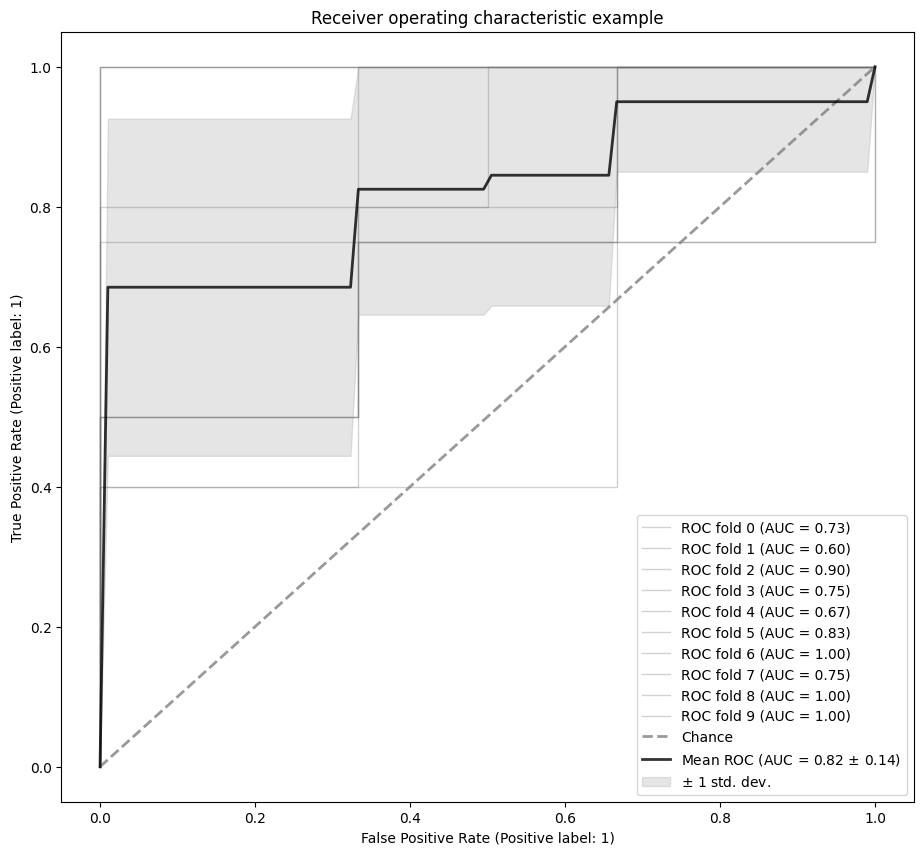

--------------------
______________stats___________________
PSPH
Test normality p-values:  3.0562591746274848e-06 9.052386076291441e-07
Patient:  7.797850834883722
Control:  5.7919153
MannwhitneyuResult(statistic=840.5, pvalue=0.012906850526514262)
GNAL
Test normality p-values:  1.4054236885385762e-07 0.0010336734121665359
Patient:  2.639884188372093
Control:  3.4150537137931036
MannwhitneyuResult(statistic=343.0, pvalue=0.001263955360795472)
EGR3
Test normality p-values:  1.4933782040316146e-05 0.000677992997225374
Patient:  4.412163248837209
Control:  3.307762513793104
MannwhitneyuResult(statistic=898.5, pvalue=0.0016185688363038648)
PTGS2
Test normality p-values:  5.899492407479556e-06 0.00016223439888563007
Patient:  4.161142890697675
Control:  2.744833824137931
MannwhitneyuResult(statistic=806.0, pvalue=0.03657191401133941)
SOD2
Test normality p-values:  1.6947915071341413e-08 1.2343526201163968e-09
Patient:  3.1554666348837213
Control:  2.520222527586207
MannwhitneyuResult(statis

In [1154]:
name = 'Schizo_filtered0.3_normalized'
best_result, best_f1, total_metrics = autoNeuro.experiments.run(
    processed[name][0],
    processed[name][1],
    experiment_name=name,
    model_names=['lgb'],
    params_grids={'lgb': val_into_list(lgb_params)},
    repeats=1,
    topN=1,
    scaling=False,
    plot_density=False,
)

---

In [1252]:
lr_params = {
    'model__class_weight': ["balanced"],
    'model__penalty': ['l1', 'l2'],
    'model__C': [10],
    'model__solver' : ['liblinear'],
    'model__random_state': [42],
}

In [1267]:
sorted(processed.keys())

['Schizo_filtered0.01_normalized',
 'Schizo_filtered0.02_normalized',
 'Schizo_filtered0.05_normalized',
 'Schizo_filtered0.1_normalized',
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.6_normalized',
 'Schizo_unfiltered_normalized',
 'Schizo_unfiltered_raw']

# Nested, unfiltered normalized

In [1467]:
lgb_params = dict(
    boosting_type='gbdt',
    objective='binary',
    n_estimators=50,
    
    num_leaves=[4, 6, 12],
    max_depth=[3, 4],
    learning_rate=[0.05],
    class_weight=None,

    min_split_gain=[0.3],
    #min_child_weight
    min_child_samples=5,

    # subsampling
    subsample=[0.8],
    colsample_bytree=[0.2, 0.8],
    
    # l1, l2 regularization
    reg_alpha=0.0,
    reg_lambda=0.0,

    # technical
    random_state=1380,
    n_jobs=8,
    silent=True,
    
    # importance
    importance_type='split', # 'gain',
)

In [1459]:
name = 'Schizo_unfiltered_normalized'
#name = 'Schizo_filtered0.6_normalized'
gs = autoNeuro.gridcv.GridSearchBase(
    processed[name][0],
    processed[name][1],
    model_names=['lgb'],
    params_grids={'lgb': val_into_list(lgb_params)},
    random_state=43,
    n_splits=10,
    internal_n_splits=10,
    scaling=False,
)

In [1460]:
%%time
nested_res = gs.nested_train()

External CV for Pipeline(steps=[('feature_selection', VarianceThreshold()),
                ('model', LGBMClassifier())])
Pipe: Pipeline(steps=[('feature_selection', VarianceThreshold()),
                ('model', LGBMClassifier())]), elapsed time: 0:27:18
External CV for Pipeline(steps=[('feature_selection', SelectKBest(k=58)),
                ('model', LGBMClassifier())])


/home/gl/miniconda3/envs/schizo/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/gl/miniconda3/envs/schizo/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/gl/miniconda3/envs/schizo/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/gl/miniconda3/envs/schizo/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/gl/miniconda3/envs/schizo/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/gl/miniconda3/envs/schizo/lib/python3.10/site-packages/sklearn/featur

Pipe: Pipeline(steps=[('feature_selection', SelectKBest(k=58)),
                ('model', LGBMClassifier())]), elapsed time: 0:07:11
External CV for Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=43),
                                 max_features=58)),
                ('model', LGBMClassifier())])
Pipe: Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=43),
                                 max_features=58)),
                ('model', LGBMClassifier())]), elapsed time: 0:07:25
CPU times: user 2h 6min 55s, sys: 6.72 s, total: 2h 7min 2s
Wall time: 41min 54s


In [1461]:
nested_res_df = pd.DataFrame(nested_res)

In [1462]:
nested_res_df

model_name                                        feat_select  \
0        lgb                                VarianceThreshold()   
1        lgb  SelectFromModel(estimator=RandomForestClassifi...   
2        lgb                                  SelectKBest(k=58)   

                                best_params_per_fold   f1_mean    f1_std  \
0  [(model__boosting_type, model__class_weight, m...  0.763889  0.125277   
1  [(model__boosting_type, model__class_weight, m...  0.747965  0.179597   
2  [(model__boosting_type, model__class_weight, m...  0.705714  0.112179   

   roc_auc_mean  roc_auc_std  acc_mean   acc_std  
0      0.676667     0.182523  0.696429  0.166028  
1      0.674167     0.177145  0.694643  0.173428  
2      0.626667     0.167857  0.639286  0.147206

In [1464]:
nested_res_df.to_pickle(f'results/{name}/lgb_1.pkl')

In [1494]:
nofilter = pd.read_pickle(f'results/Schizo_unfiltered_normalized/lgb_1.pkl')

## repeat for other datasets

In [1476]:
import os
for name in processed.keys():
    if not os.path.exists(f'results/{name}/'):
        os.makedirs(f'results/{name}/')

In [1468]:
sorted(processed.keys())

['Schizo_filtered0.01_normalized',
 'Schizo_filtered0.02_normalized',
 'Schizo_filtered0.05_normalized',
 'Schizo_filtered0.1_normalized',
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.6_normalized',
 'Schizo_unfiltered_normalized',
 'Schizo_unfiltered_raw']

In [1474]:
lgb_params_2 = dict(
    boosting_type='gbdt',
    objective='binary',
    n_estimators=50,
    
    num_leaves=[3, 6],
    max_depth=[2, 3],
    learning_rate=[0.05],
    class_weight=None,

    min_split_gain=[0.3],
    #min_child_weight
    min_child_samples=5,

    # subsampling
    subsample=[0.8],
    colsample_bytree=[0.2],
    
    # l1, l2 regularization
    reg_alpha=0.0,
    reg_lambda=0.0,

    # technical
    random_state=1380,
    n_jobs=8,
    silent=True,
    
    # importance
    importance_type='split', # 'gain',
)

In [1477]:
res = {}
for name in [
 'Schizo_filtered0.01_normalized',
 'Schizo_filtered0.02_normalized',
 'Schizo_filtered0.05_normalized',
 'Schizo_filtered0.1_normalized',
#  'Schizo_filtered0.2_normalized',
#  'Schizo_filtered0.3_normalized',
#  'Schizo_filtered0.4_normalized',
#  'Schizo_filtered0.5_normalized',
#  'Schizo_filtered0.6_normalized',
]:
    print(f'dataset: {name}')
    gs = autoNeuro.gridcv.GridSearchBase(
        processed[name][0],
        processed[name][1],
        model_names=['lgb'],
        params_grids={'lgb': val_into_list(lgb_params_2)},
        random_state=43,
        n_splits=10,
        internal_n_splits=10,
        scaling=False,
    )
    nested_res = gs.nested_train()
    res[name] = nested_res_df
    nested_res_df = pd.DataFrame(nested_res)
    nested_res_df.to_pickle(f'results/{name}/lgb_1.pkl')

dataset: Schizo_filtered0.01_normalized
External CV for Pipeline(steps=[('feature_selection', VarianceThreshold()),
                ('model', LGBMClassifier())])
Pipe: Pipeline(steps=[('feature_selection', VarianceThreshold()),
                ('model', LGBMClassifier())]), elapsed time: 0:08:46
External CV for Pipeline(steps=[('feature_selection', SelectKBest(k=58)),
                ('model', LGBMClassifier())])
Pipe: Pipeline(steps=[('feature_selection', SelectKBest(k=58)),
                ('model', LGBMClassifier())]), elapsed time: 0:02:32
External CV for Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=43),
                                 max_features=58)),
                ('model', LGBMClassifier())])
Pipe: Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
      

In [1480]:
for k, v in res.items():
    print(k)
    print(v.loc[0, ['f1_mean', 'f1_std']])

Schizo_filtered0.01_normalized
f1_mean    0.763889
f1_std     0.125277
Name: 0, dtype: object
Schizo_filtered0.02_normalized
f1_mean    0.843442
f1_std     0.079581
Name: 0, dtype: object
Schizo_filtered0.05_normalized
f1_mean    0.786634
f1_std     0.068035
Name: 0, dtype: object
Schizo_filtered0.1_normalized
f1_mean    0.740512
f1_std     0.141055
Name: 0, dtype: object


### part3

In [1482]:
lgb_params_3 = dict(
    boosting_type='gbdt',
    objective='binary',
    n_estimators=50,
    
    num_leaves=[3, 6],
    max_depth=[2, 3],
    learning_rate=[0.05],
    class_weight=None,

    min_split_gain=[0.3, 0.5],
    #min_child_weight
    min_child_samples=5,

    # subsampling
    subsample=[0.8],
    colsample_bytree=[0.2, 0.5, 0.8],
    
    # l1, l2 regularization
    reg_alpha=0.0,
    reg_lambda=0.0,

    # technical
    random_state=1380,
    n_jobs=8,
    silent=True,
    
    # importance
    importance_type='split', # 'gain',
)

In [1483]:
for name in [
#  'Schizo_filtered0.01_normalized',
#  'Schizo_filtered0.02_normalized',
#  'Schizo_filtered0.05_normalized',
#  'Schizo_filtered0.1_normalized',
    
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.6_normalized',
]:
    print(f'dataset: {name}')
    gs = autoNeuro.gridcv.GridSearchBase(
        processed[name][0],
        processed[name][1],
        model_names=['lgb'],
        params_grids={'lgb': val_into_list(lgb_params_3)},
        random_state=43,
        n_splits=10,
        internal_n_splits=10,
        scaling=False,
    )
    nested_res = gs.nested_train()
    res[name] = nested_res_df
    nested_res_df = pd.DataFrame(nested_res)
    nested_res_df.to_pickle(f'results/{name}/lgb_1.pkl')

dataset: Schizo_filtered0.2_normalized
External CV for Pipeline(steps=[('feature_selection', VarianceThreshold()),
                ('model', LGBMClassifier())])
Pipe: Pipeline(steps=[('feature_selection', VarianceThreshold()),
                ('model', LGBMClassifier())]), elapsed time: 0:01:38
External CV for Pipeline(steps=[('feature_selection', SelectKBest(k=58)),
                ('model', LGBMClassifier())])
Pipe: Pipeline(steps=[('feature_selection', SelectKBest(k=58)),
                ('model', LGBMClassifier())]), elapsed time: 0:01:09
External CV for Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=43),
                                 max_features=58)),
                ('model', LGBMClassifier())])
Pipe: Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
       

### raw

In [1491]:
lgb_params_4 = dict(
    boosting_type='gbdt',
    objective='binary',
    n_estimators=50,
    
    num_leaves=[6],
    max_depth=[3],
    learning_rate=[0.05],
    class_weight=None,

    min_split_gain=[0.3, 0.5],
    #min_child_weight
    min_child_samples=[5],

    # subsampling
    subsample=[0.8],
    colsample_bytree=[0.2,],
    
    # l1, l2 regularization
    reg_alpha=0.0,
    reg_lambda=0.0,

    # technical
    random_state=1380,
    n_jobs=8,
    silent=True,
    
    # importance
    importance_type='split', # 'gain',
)

In [1492]:
for name in [
    'Schizo_unfiltered_raw'
]:
    print(f'dataset: {name}')
    gs = autoNeuro.gridcv.GridSearchBase(
        processed[name][0],
        processed[name][1],
        model_names=['lgb'],
        params_grids={'lgb': val_into_list(lgb_params_4)},
        random_state=43,
        n_splits=10,
        internal_n_splits=10,
        scaling=False,
    )
    nested_res = gs.nested_train()
    res[name] = nested_res_df
    nested_res_df = pd.DataFrame(nested_res)
    nested_res_df.to_pickle(f'results/{name}/lgb_1.pkl')

dataset: Schizo_unfiltered_raw
External CV for Pipeline(steps=[('feature_selection', VarianceThreshold()),
                ('model', LGBMClassifier())])
Pipe: Pipeline(steps=[('feature_selection', VarianceThreshold()),
                ('model', LGBMClassifier())]), elapsed time: 0:06:04
External CV for Pipeline(steps=[('feature_selection', SelectKBest(k=58)),
                ('model', LGBMClassifier())])
Pipe: Pipeline(steps=[('feature_selection', SelectKBest(k=58)),
                ('model', LGBMClassifier())]), elapsed time: 0:01:35
External CV for Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=43),
                                 max_features=58)),
                ('model', LGBMClassifier())])
Pipe: Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
               

In [1493]:
for k in sorted(res.keys()):
    print(k)
    print(res[k].loc[0, ['f1_mean', 'f1_std']])

Schizo_filtered0.01_normalized
f1_mean    0.763889
f1_std     0.125277
Name: 0, dtype: object
Schizo_filtered0.02_normalized
f1_mean    0.843442
f1_std     0.079581
Name: 0, dtype: object
Schizo_filtered0.05_normalized
f1_mean    0.786634
f1_std     0.068035
Name: 0, dtype: object
Schizo_filtered0.1_normalized
f1_mean    0.740512
f1_std     0.141055
Name: 0, dtype: object
Schizo_filtered0.2_normalized
f1_mean    0.779394
f1_std     0.130023
Name: 0, dtype: object
Schizo_filtered0.3_normalized
f1_mean    0.829856
f1_std     0.092876
Name: 0, dtype: object
Schizo_filtered0.4_normalized
f1_mean    0.749502
f1_std      0.16207
Name: 0, dtype: object
Schizo_filtered0.5_normalized
f1_mean    0.689242
f1_std     0.135417
Name: 0, dtype: object
Schizo_filtered0.6_normalized
f1_mean    0.587648
f1_std     0.275707
Name: 0, dtype: object
Schizo_unfiltered_raw
f1_mean    0.724044
f1_std     0.077539
Name: 0, dtype: object


## combine results for all datasets

In [1496]:
res = {}
for name in processed:
    df = pd.read_pickle(f'results/{name}/lgb_1.pkl')
    df['dataset'] = name
    res[name] = df

In [1498]:
res['Schizo_filtered0.5_normalized']

model_name          feat_select  \
0        lgb  VarianceThreshold()   

                                best_params_per_fold   f1_mean    f1_std  \
0  [(model__boosting_type, model__class_weight, m...  0.587648  0.275707   

   roc_auc_mean  roc_auc_std  acc_mean   acc_std  \
0        0.5975     0.199268  0.585714  0.201644   

                         dataset  
0  Schizo_filtered0.5_normalized

In [1499]:
final_res = []
for v in res.values():
    final_res.append(v.iloc[0])
final_res = pd.DataFrame(final_res)

In [1551]:
final_res.sort_values(by='f1_mean', ascending=False).reset_index(drop=True).to_pickle('results/lgb_1_best.pkl')

In [1510]:
x

model_name                                        feat_select  \
0         lgb  SelectFromModel(estimator=RandomForestClassifi...   
1         lgb                                  SelectKBest(k=58)   
2         lgb  SelectFromModel(estimator=RandomForestClassifi...   
3         lgb  SelectFromModel(estimator=RandomForestClassifi...   
4         lgb                                VarianceThreshold()   
5         lgb                                VarianceThreshold()   
6         lgb  SelectFromModel(estimator=RandomForestClassifi...   
7         lgb                                VarianceThreshold()   
8         lgb                                VarianceThreshold()   
9         lgb                                VarianceThreshold()   
10        lgb                                VarianceThreshold()   

                                 best_params_per_fold   f1_mean    f1_std  \
0   [(model__boosting_type, model__class_weight, m...  0.843442  0.079581   
1   [(model__boosting_type, model__class_weight, m...  0.829856  0.092876   
2   [(model__boosting_type, model__class_weight, m...  0.786634  0.068035   
3   [(model__boosting_type, model__class_weight, m...  0.781061  0.096299   
4   [(model__boosting_type, model__class_weight, m...  0.779394  0.130023   
5   [(model__boosting_type, model__class_weight, m...  0.763889  0.125277   
6   [(model__boosting_type, model__class_weight, m...  0.749502  0.162070   
7   [(model__boosting_type, model__class_weight, m...  0.740512  0.141055   
8   [(model__boosting_type, model__class_weight, m...  0.724044  0.077539   
9   [(model__boosting_type, model__class_weight, m...  0.689242  0.135417   
10  [(model__boosting_type, model__class_weight, m...  0.587648  0.275707   

    roc_auc_mean  roc_auc_std  acc_mean   acc_std  \
0       0.774167     0.129126  0.794643  0.109514   
1       0.750833     0.152219  0.778571  0.131546   
2       0.703333     0.139067  0.725000  0.103510   
3       0.673333     0.143738  0.707143  0.126885   
4       0.678333     0.188652  0.707143  0.172352   
5       0.676667     0.182523  0.696429  0.166028   
6       0.682500     0.233050  0.691071  0.208257   
7       0.632500     0.189071  0.662500  0.184514   
8       0.549167     0.135141  0.610714  0.111930   
9       0.654167     0.161601  0.650000  0.155265   
10      0.597500     0.199268  0.585714  0.201644   

                           dataset  
0   Schizo_filtered0.01_normalized  
1    Schizo_filtered0.2_normalized  
2   Schizo_filtered0.02_normalized  
3            Schizo_unfiltered_raw  
4    Schizo_filtered0.1_normalized  
5     Schizo_unfiltered_normalized  
6    Schizo_filtered0.3_normalized  
7   Schizo_filtered0.05_normalized  
8    Schizo_filtered0.6_normalized  
9    Schizo_filtered0.4_normalized  
10   Schizo_filtered0.5_normalized

----

In [1518]:
from itertools import pairwise

In [1514]:
lst = x.loc[6, 'best_params_per_fold']

In [1516]:
lst[0].keys() == lst[1].keys()

True

In [1523]:
def config_union(lst):
    # filter out all the params that are the same
    if not lst:
        return {}
    # check that all dicts have the same set of keys
    for a,b in pairwise(lst):
        if a.keys() != b.keys():
            raise ValueError('config have different keys!')
    
    constants = {}
    diff = {}
    for k in lst[0].keys():
        vals = {d[k] for d in lst}
        if len(vals) == 1:
            constants[k] = vals.pop()
        else:
            diff[k] = list(vals)
    
    return constants, diff

In [1524]:
co, di = config_union(lst)

In [1525]:
co

{'model__boosting_type': 'gbdt',
 'model__class_weight': None,
 'model__importance_type': 'split',
 'model__learning_rate': 0.05,
 'model__min_child_samples': 5,
 'model__n_estimators': 50,
 'model__n_jobs': 8,
 'model__objective': 'binary',
 'model__random_state': 1380,
 'model__reg_alpha': 0.0,
 'model__reg_lambda': 0.0,
 'model__silent': True,
 'model__subsample': 0.8}

In [1526]:
di

{'model__colsample_bytree': [0.5, 0.8, 0.2],
 'model__max_depth': [2, 3],
 'model__min_split_gain': [0.5, 0.3],
 'model__num_leaves': [3, 6]}

# RF

In [1531]:
sorted(processed.keys(), reverse=True)

['Schizo_unfiltered_raw',
 'Schizo_unfiltered_normalized',
 'Schizo_filtered0.6_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.1_normalized',
 'Schizo_filtered0.05_normalized',
 'Schizo_filtered0.02_normalized',
 'Schizo_filtered0.01_normalized']

In [1534]:
res_rf = {}

In [1540]:
    gs = autoNeuro.gridcv.GridSearchBase(
        processed[name][0],
        processed[name][1],
        model_names=['rf'],
        #params_grids={'lgb': val_into_list(lgb_params_3)},
        random_state=43,
        n_splits=10,
        internal_n_splits=10,
        scaling=False,
    )

In [1546]:
for name in [
 'Schizo_filtered0.6_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.1_normalized',
 'Schizo_filtered0.05_normalized',
 'Schizo_filtered0.02_normalized',
 'Schizo_filtered0.01_normalized',
 
'Schizo_unfiltered_raw',
 'Schizo_unfiltered_normalized',
]:
    print(f'Dataset: {name}')
    gs = autoNeuro.gridcv.GridSearchBase(
        processed[name][0],
        processed[name][1],
        model_names=['rf'],
        params_grids={
            "rf": {
                'model__n_estimators': [10, 50, 100],
                'model__max_depth':  [3,5,7,9],
                'model__class_weight': [None],
                'model__random_state': [43],
            },
        },
        random_state=43,
        n_splits=10,
        internal_n_splits=10,
        scaling=False,
    )
    nested_res = gs.nested_train()
    res_rf[name] = nested_res_df
    nested_res_df = pd.DataFrame(nested_res)
    nested_res_df.to_pickle(f'results/{name}/rf_0.pkl')

Dataset: Schizo_filtered0.6_normalized
External CV for Pipeline(steps=[('feature_selection', VarianceThreshold()),
                ('model', RandomForestClassifier())])
Pipe: Pipeline(steps=[('feature_selection', VarianceThreshold()),
                ('model', RandomForestClassifier())]), elapsed time: 0:00:52
Dataset: Schizo_filtered0.5_normalized
External CV for Pipeline(steps=[('feature_selection', VarianceThreshold()),
                ('model', RandomForestClassifier())])
Pipe: Pipeline(steps=[('feature_selection', VarianceThreshold()),
                ('model', RandomForestClassifier())]), elapsed time: 0:00:55
Dataset: Schizo_filtered0.4_normalized
External CV for Pipeline(steps=[('feature_selection', VarianceThreshold()),
                ('model', RandomForestClassifier())])
Pipe: Pipeline(steps=[('feature_selection', VarianceThreshold()),
                ('model', RandomForestClassifier())]), elapsed time: 0:00:56
Dataset: Schizo_filtered0.3_normalized
External CV for Pipeline(

Pipe: Pipeline(steps=[('feature_selection', VarianceThreshold()),
                ('model', RandomForestClassifier())]), elapsed time: 0:09:57
External CV for Pipeline(steps=[('feature_selection', SelectKBest(k=58)),
                ('model', RandomForestClassifier())])
Pipe: Pipeline(steps=[('feature_selection', SelectKBest(k=58)),
                ('model', RandomForestClassifier())]), elapsed time: 0:09:15
External CV for Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=43),
                                 max_features=58)),
                ('model', RandomForestClassifier())])
Pipe: Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=43),
                                 max_features=58)),


/home/gl/miniconda3/envs/schizo/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/gl/miniconda3/envs/schizo/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/gl/miniconda3/envs/schizo/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/gl/miniconda3/envs/schizo/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/gl/miniconda3/envs/schizo/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/gl/miniconda3/envs/schizo/lib/python3.10/site-packages/sklearn/featur

Pipe: Pipeline(steps=[('feature_selection', SelectKBest(k=58)),
                ('model', RandomForestClassifier())]), elapsed time: 0:09:18
External CV for Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=43),
                                 max_features=58)),
                ('model', RandomForestClassifier())])
Pipe: Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=43),
                                 max_features=58)),
                ('model', RandomForestClassifier())]), elapsed time: 0:09:16


In [1557]:
res_rf = {}
for name in processed:
    df = pd.read_pickle(f'results/{name}/rf_0.pkl')
    df['dataset'] = name
    res_rf[name] = df

In [1562]:
final_res_rf = []
for v in res_rf.values():
    final_res_rf.append(v.iloc[0])
final_res_rf = pd.DataFrame(final_res_rf).sort_values(by='f1_mean', ascending=False).reset_index(drop=True)

In [1563]:
final_res_rf.to_pickle('results/rf_1_best.pkl')

In [1564]:
final_res_rf

model_name                                        feat_select  \
0          rf                                VarianceThreshold()   
1          rf  SelectFromModel(estimator=RandomForestClassifi...   
2          rf                                VarianceThreshold()   
3          rf                                VarianceThreshold()   
4          rf                                VarianceThreshold()   
5          rf                                VarianceThreshold()   
6          rf  SelectFromModel(estimator=RandomForestClassifi...   
7          rf                                  SelectKBest(k=58)   
8          rf                                VarianceThreshold()   
9          rf                                VarianceThreshold()   
10         rf                                VarianceThreshold()   

                                 best_params_per_fold   f1_mean    f1_std  \
0   [(model__class_weight, model__max_depth, model...  0.805253  0.102195   
1   [(model__class_weight, model__max_depth, model...  0.793203  0.132263   
2   [(model__class_weight, model__max_depth, model...  0.785909  0.108397   
3   [(model__class_weight, model__max_depth, model...  0.785887  0.121918   
4   [(model__class_weight, model__max_depth, model...  0.776270  0.139325   
5   [(model__class_weight, model__max_depth, model...  0.773131  0.104027   
6   [(model__class_weight, model__max_depth, model...  0.729127  0.165571   
7   [(model__class_weight, model__max_depth, model...  0.700584  0.109442   
8   [(model__class_weight, model__max_depth, model...  0.675714  0.127858   
9   [(model__class_weight, model__max_depth, model...  0.673828  0.209540   
10  [(model__class_weight, model__max_depth, model...  0.577937  0.259478   

    roc_auc_mean  roc_auc_std  acc_mean   acc_std  \
0       0.694167     0.155409  0.735714  0.142061   
1       0.710000     0.158153  0.737500  0.152001   
2       0.690833     0.143019  0.719643  0.137305   
3       0.701667     0.157958  0.721429  0.147782   
4       0.680833     0.187291  0.710714  0.173703   
5       0.636667     0.162266  0.682143  0.145023   
6       0.676667     0.226957  0.680357  0.207302   
7       0.641667     0.127112  0.651786  0.121769   
8       0.592500     0.207887  0.603571  0.176937   
9       0.592500     0.211054  0.614286  0.218899   
10      0.501667     0.239334  0.517857  0.248151   

                           dataset  
0    Schizo_filtered0.2_normalized  
1            Schizo_unfiltered_raw  
2   Schizo_filtered0.02_normalized  
3   Schizo_filtered0.01_normalized  
4     Schizo_unfiltered_normalized  
5   Schizo_filtered0.05_normalized  
6    Schizo_filtered0.3_normalized  
7    Schizo_filtered0.1_normalized  
8    Schizo_filtered0.4_normalized  
9    Schizo_filtered0.6_normalized  
10   Schizo_filtered0.5_normalized

# svm

In [1534]:
res_svc = {}

In [1566]:
gs.params_grids['svm']

{'model__C': [0.01, 0.1, 1, 3, 10],
 'model__kernel': ['linear', 'rbf'],
 'model__class_weight': ['balanced', None],
 'model__probability': [True],
 'model__random_state': [42]}

In [1567]:
for name in [
 'Schizo_filtered0.6_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.1_normalized',
 'Schizo_filtered0.05_normalized',
 'Schizo_filtered0.02_normalized',
 
 #'Schizo_filtered0.01_normalized',
 #'Schizo_unfiltered_raw',
 #'Schizo_unfiltered_normalized',
]:
    print(f'Dataset: {name}')
    gs = autoNeuro.gridcv.GridSearchBase(
        processed[name][0],
        processed[name][1],
        model_names=['svm'],
        params_grids={'svm': {
            'model__C': [0.01, 0.1, 1, 10],
            'model__kernel': ['linear', 'rbf'],
            'model__class_weight': ['balanced', None],
            'model__probability': [True],
            'model__random_state': [43],
        }
        },
        random_state=43,
        n_splits=10,
        internal_n_splits=10,
        scaling=False,
    )
    nested_res = gs.nested_train()
    res_rf[name] = nested_res_df
    nested_res_df = pd.DataFrame(nested_res)
    nested_res_df.to_pickle(f'results/{name}/svm_0.pkl')

Dataset: Schizo_filtered0.6_normalized
External CV for Pipeline(steps=[('feature_selection', VarianceThreshold()), ('model', SVC())])
Pipe: Pipeline(steps=[('feature_selection', VarianceThreshold()), ('model', SVC())]), elapsed time: 0:00:12
Dataset: Schizo_filtered0.5_normalized
External CV for Pipeline(steps=[('feature_selection', VarianceThreshold()), ('model', SVC())])
Pipe: Pipeline(steps=[('feature_selection', VarianceThreshold()), ('model', SVC())]), elapsed time: 0:00:15
Dataset: Schizo_filtered0.4_normalized
External CV for Pipeline(steps=[('feature_selection', VarianceThreshold()), ('model', SVC())])
Pipe: Pipeline(steps=[('feature_selection', VarianceThreshold()), ('model', SVC())]), elapsed time: 0:00:15
Dataset: Schizo_filtered0.3_normalized
External CV for Pipeline(steps=[('feature_selection', VarianceThreshold()), ('model', SVC())])
Pipe: Pipeline(steps=[('feature_selection', VarianceThreshold()), ('model', SVC())]), elapsed time: 0:00:16
External CV for Pipeline(steps=[

KeyboardInterrupt: 

In [ ]:
for name in [ 
 'Schizo_filtered0.01_normalized',
 'Schizo_unfiltered_raw',
 'Schizo_unfiltered_normalized',
]:
    print(f'Dataset: {name}')
    gs = autoNeuro.gridcv.GridSearchBase(
        processed[name][0],
        processed[name][1],
        model_names=['svm'],
        params_grids={'svm': {
            'model__C': [0.01, 0.1, 1, 10],
            'model__kernel': ['linear', 'rbf'],
            'model__class_weight': ['balanced', None],
            'model__probability': [True],
            'model__random_state': [43],
        }
        },
        random_state=43,
        n_splits=10,
        internal_n_splits=10,
        scaling=False,
    )
    nested_res = gs.nested_train()
    res_rf[name] = nested_res_df
    nested_res_df = pd.DataFrame(nested_res)
    nested_res_df.to_pickle(f'results/{name}/svm_0.pkl')

In [1569]:
res_svm = {}
for name in processed:
    df = pd.read_pickle(f'results/{name}/svm_0.pkl')
    df['dataset'] = name
    res_svm[name] = df

In [ ]:
final_res_svm = []
for v in res_svm.values():
    final_res_svm.append(v.iloc[0])
final_res_svm = pd.DataFrame(final_res_svm).sort_values(by='f1_mean', ascending=False).reset_index(drop=True)

In [ ]:
final_res_svm.to_pickle('results/svm_1_best.pkl')

In [ ]:
final_res_svm

# Let's take a look at features we obtain via different feature selection method

In [1439]:
_X, _y, _ = processed['Schizo_unfiltered_normalized']

In [1571]:
r1 = pd.read_pickle('results/lgb_1_best.pkl')

In [1572]:
r1 = pd.read_pickle('results/rf_1_best.pkl')